In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import warnings
warnings.filterwarnings('ignore')

In [3]:
# CSV 데이터 로드
csv_path = "../datas/gas_sensors_dataset/Gas_Sensors_Measurements.csv"
df = pd.read_csv(csv_path)

print('센서 데이터셋 기본 정보')
df.info()
print()
print('데이터셋 첫 5행')
df.head()
print()
print('가스 종류별 데이터 분포')
df['Gas'].value_counts()

센서 데이터셋 기본 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Serial Number             6400 non-null   int64 
 1   MQ2                       6400 non-null   int64 
 2   MQ3                       6400 non-null   int64 
 3   MQ5                       6400 non-null   int64 
 4   MQ6                       6400 non-null   int64 
 5   MQ7                       6400 non-null   int64 
 6   MQ8                       6400 non-null   int64 
 7   MQ135                     6400 non-null   int64 
 8   Gas                       6400 non-null   object
 9   Corresponding Image Name  6400 non-null   object
dtypes: int64(8), object(2)
memory usage: 500.1+ KB

데이터셋 첫 5행

가스 종류별 데이터 분포


Gas
NoGas      1600
Perfume    1600
Smoke      1600
Mixture    1600
Name: count, dtype: int64

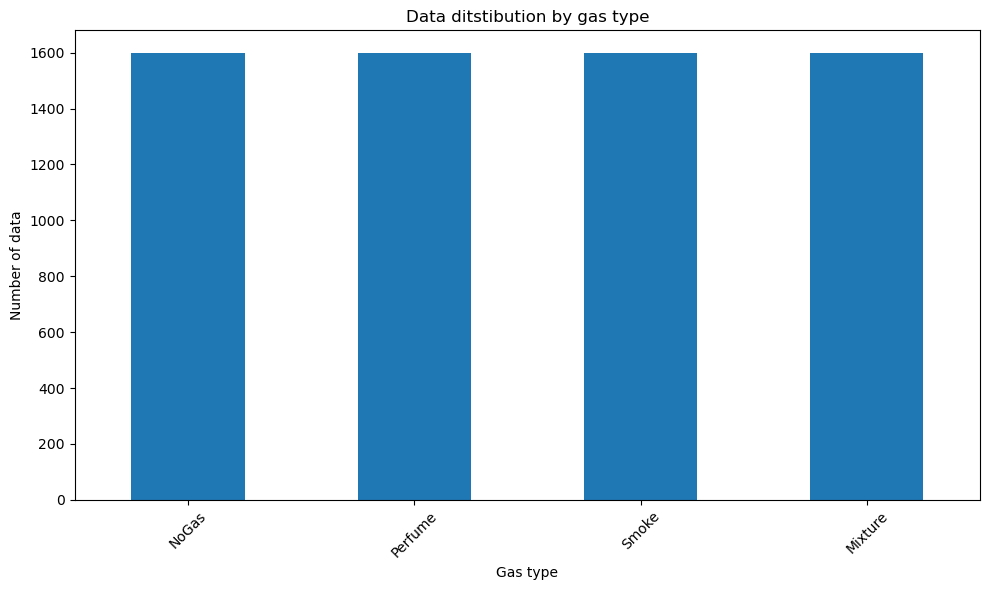

In [4]:
# 시각화
plt.figure(figsize=(10, 6))
df['Gas'].value_counts().plot.bar()
plt.title('Data ditstibution by gas type')
plt.xlabel('Gas type')
plt.ylabel('Number of data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
sensor_cols = ['MQ2', 'MQ3', 'MQ5', 'MQ6', 'MQ7', 'MQ8', 'MQ135']
print('센서 데이터 기술 통계')
df[sensor_cols].describe()

센서 데이터 기술 통계


MQ2          MQ3          MQ5          MQ6          MQ7  \
count  6400.000000  6400.000000  6400.000000  6400.000000  6400.000000   
mean    677.593438   462.024688   404.579063   399.758750   565.952031   
std      92.913955    70.284038    55.672249    45.091353    83.133693   
min     502.000000   337.000000   291.000000   311.000000   361.000000   
25%     591.000000   405.000000   366.000000   366.000000   524.000000   
50%     701.000000   486.000000   400.000000   393.000000   576.000000   
75%     756.000000   529.000000   443.000000   426.000000   629.000000   
max     824.000000   543.000000   596.000000   524.000000   796.000000   

               MQ8        MQ135  
count  6400.000000  6400.000000  
mean    542.473750   416.727031  
std     151.020217    76.681407  
min     220.000000   275.000000  
25%     447.000000   354.000000  
50%     576.000000   437.000000  
75%     642.000000   473.000000  
max     794.000000   589.000000

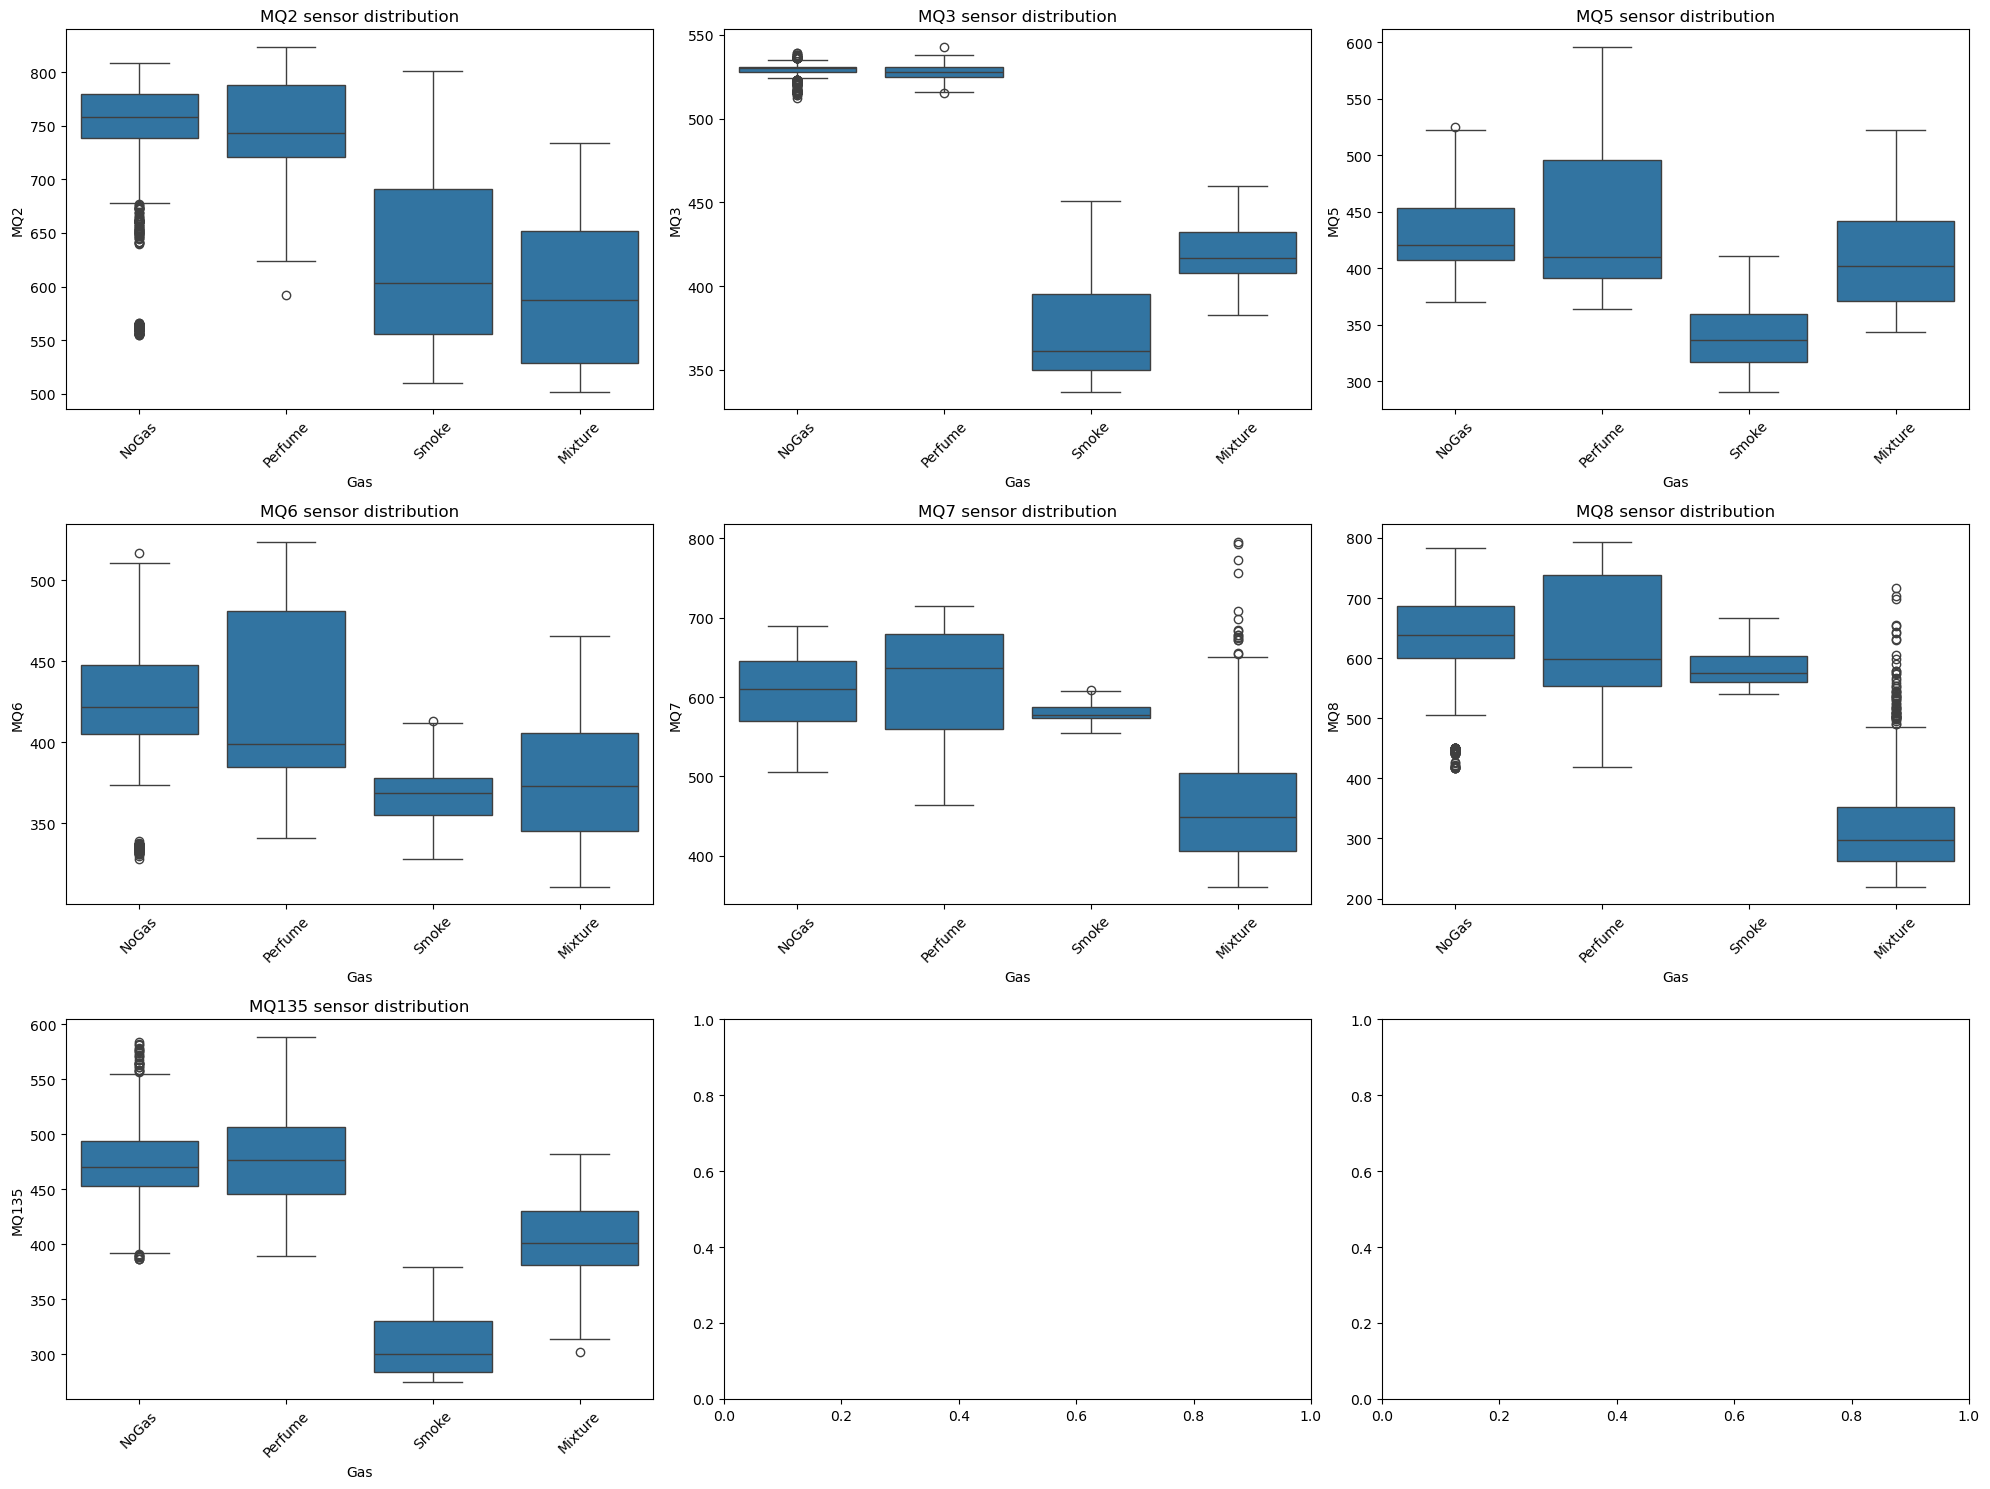

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel() # 넘파이 배열 1차원 flat 해주는

for i, sensor in enumerate(sensor_cols):
    sns.boxplot(data=df, x='Gas', y=sensor, ax=axes[i])
    axes[i].set_title(f"{sensor} sensor distribution")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

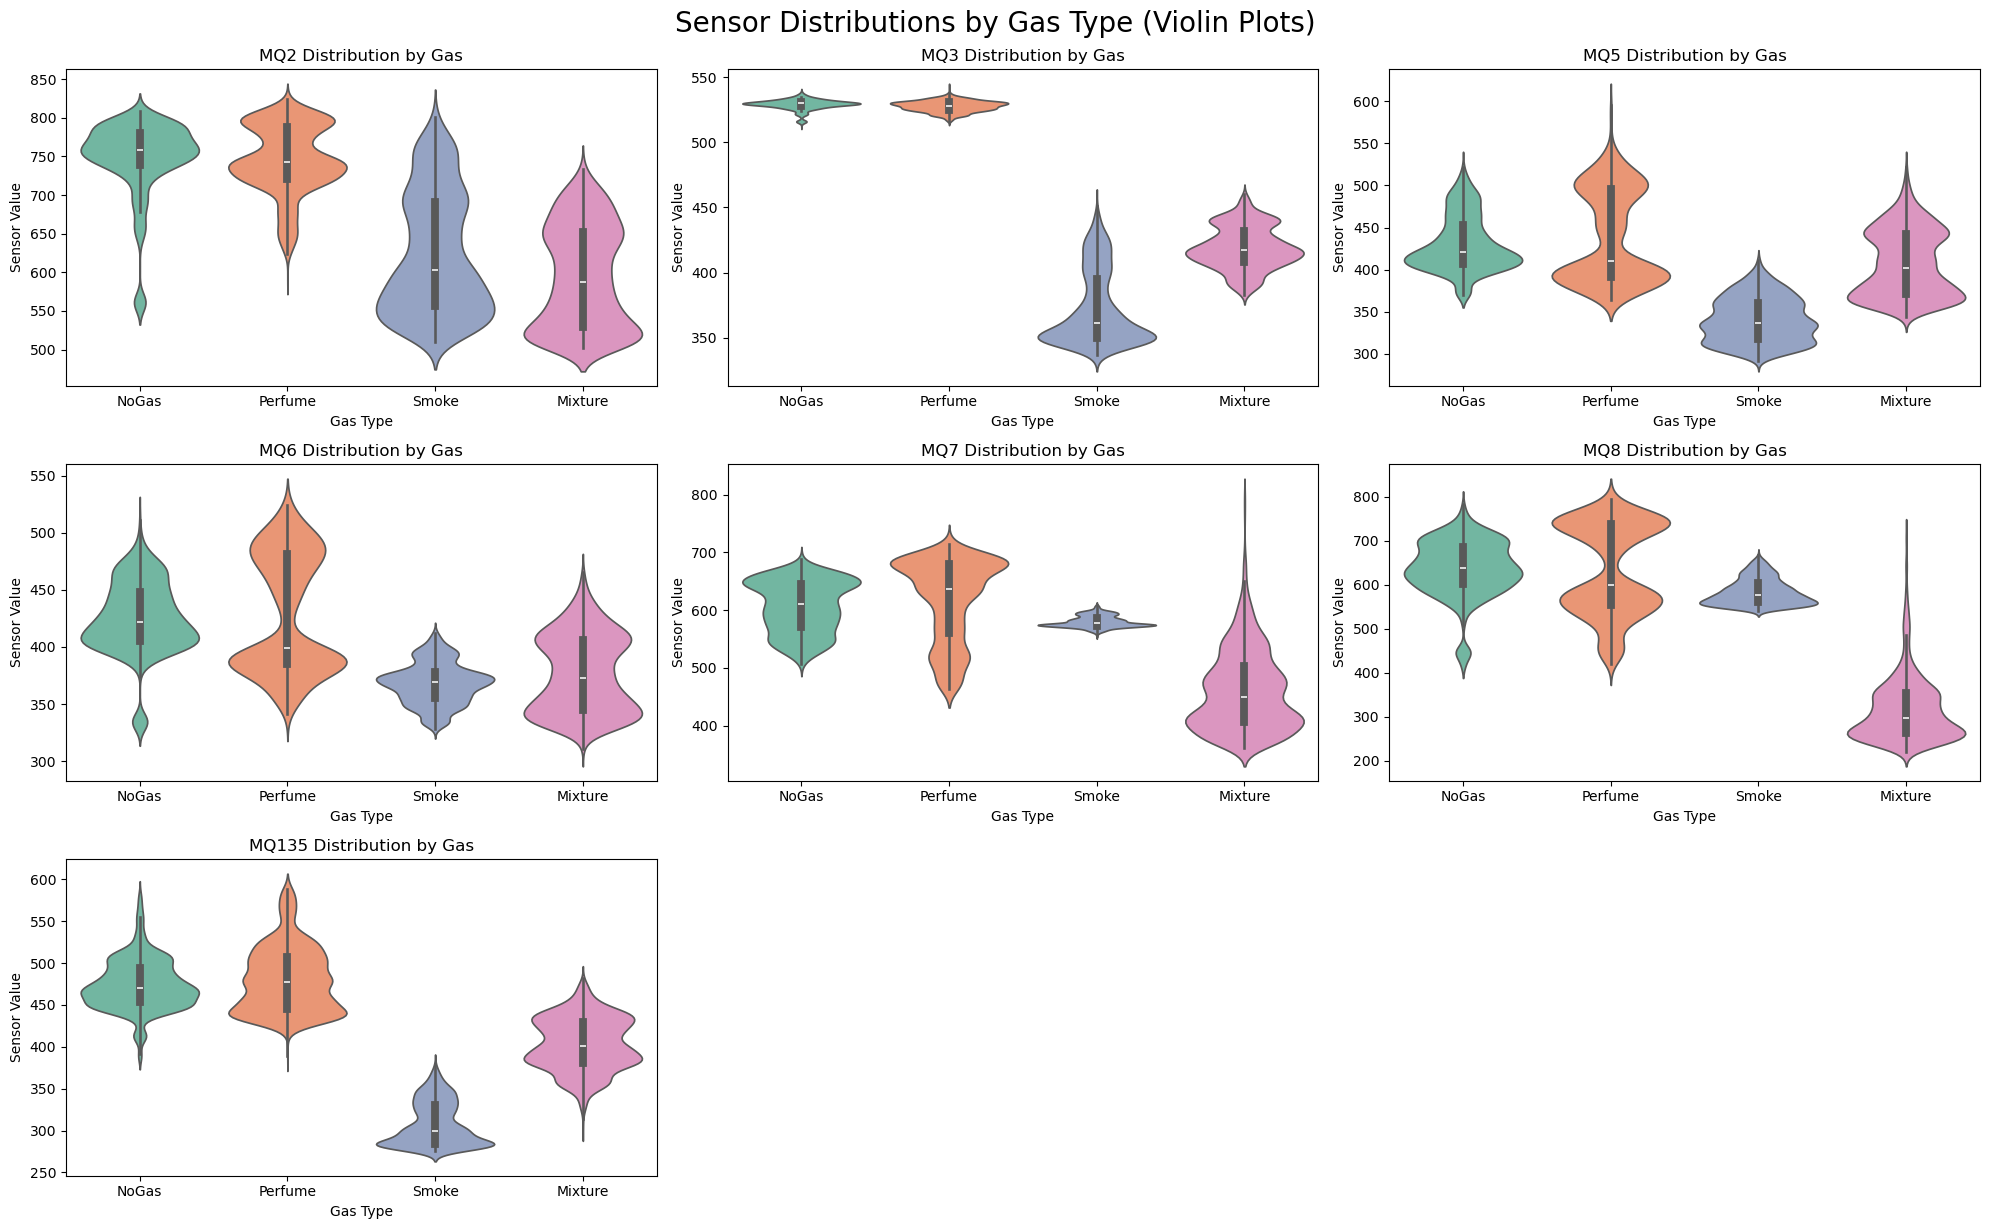

In [7]:
sensor_cols = ['MQ2', 'MQ3', 'MQ5', 'MQ6', 'MQ7', 'MQ8', 'MQ135']

plt.figure(figsize=(20, 12))

for i, sensor in enumerate(sensor_cols):
    plt.subplot(3, 3, i+1)
    sns.violinplot(x='Gas', y=sensor, data=df, palette='Set2', inner='box')
    plt.title(f'{sensor} Distribution by Gas')
    plt.xlabel('Gas Type')
    plt.ylabel('Sensor Value')

plt.tight_layout()
plt.suptitle("Sensor Distributions by Gas Type (Violin Plots)", fontsize=20, y=1.02)
plt.show()

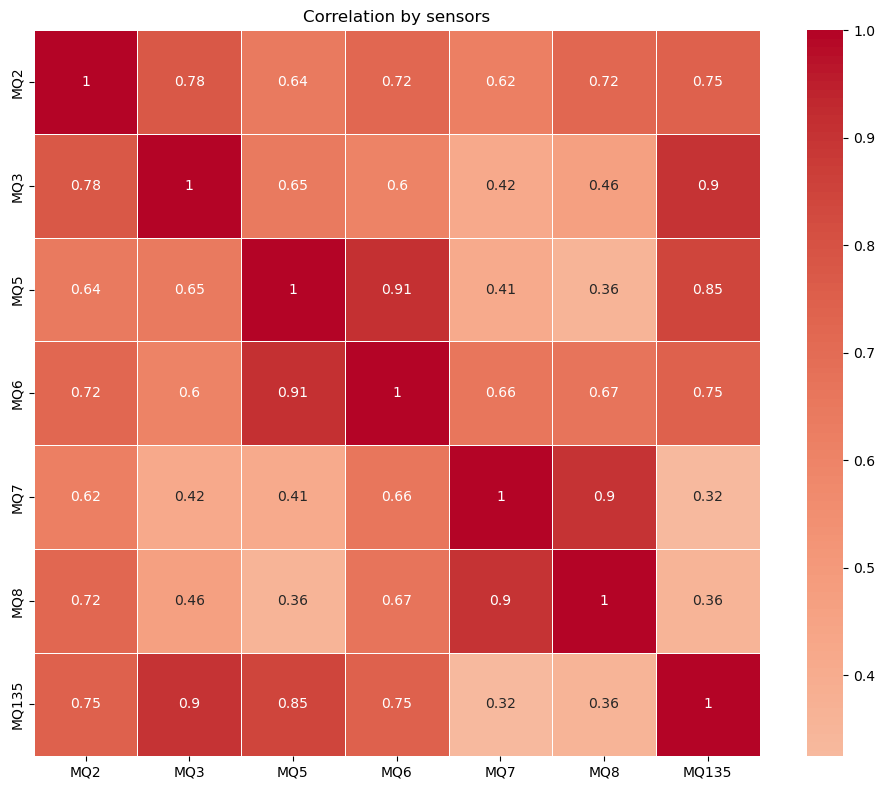

In [8]:
# 센서간 상관관계 분석
plt.figure(figsize=(10, 8))
correlation_matrix = df[sensor_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Correlation by sensors')
plt.tight_layout()
plt.show()

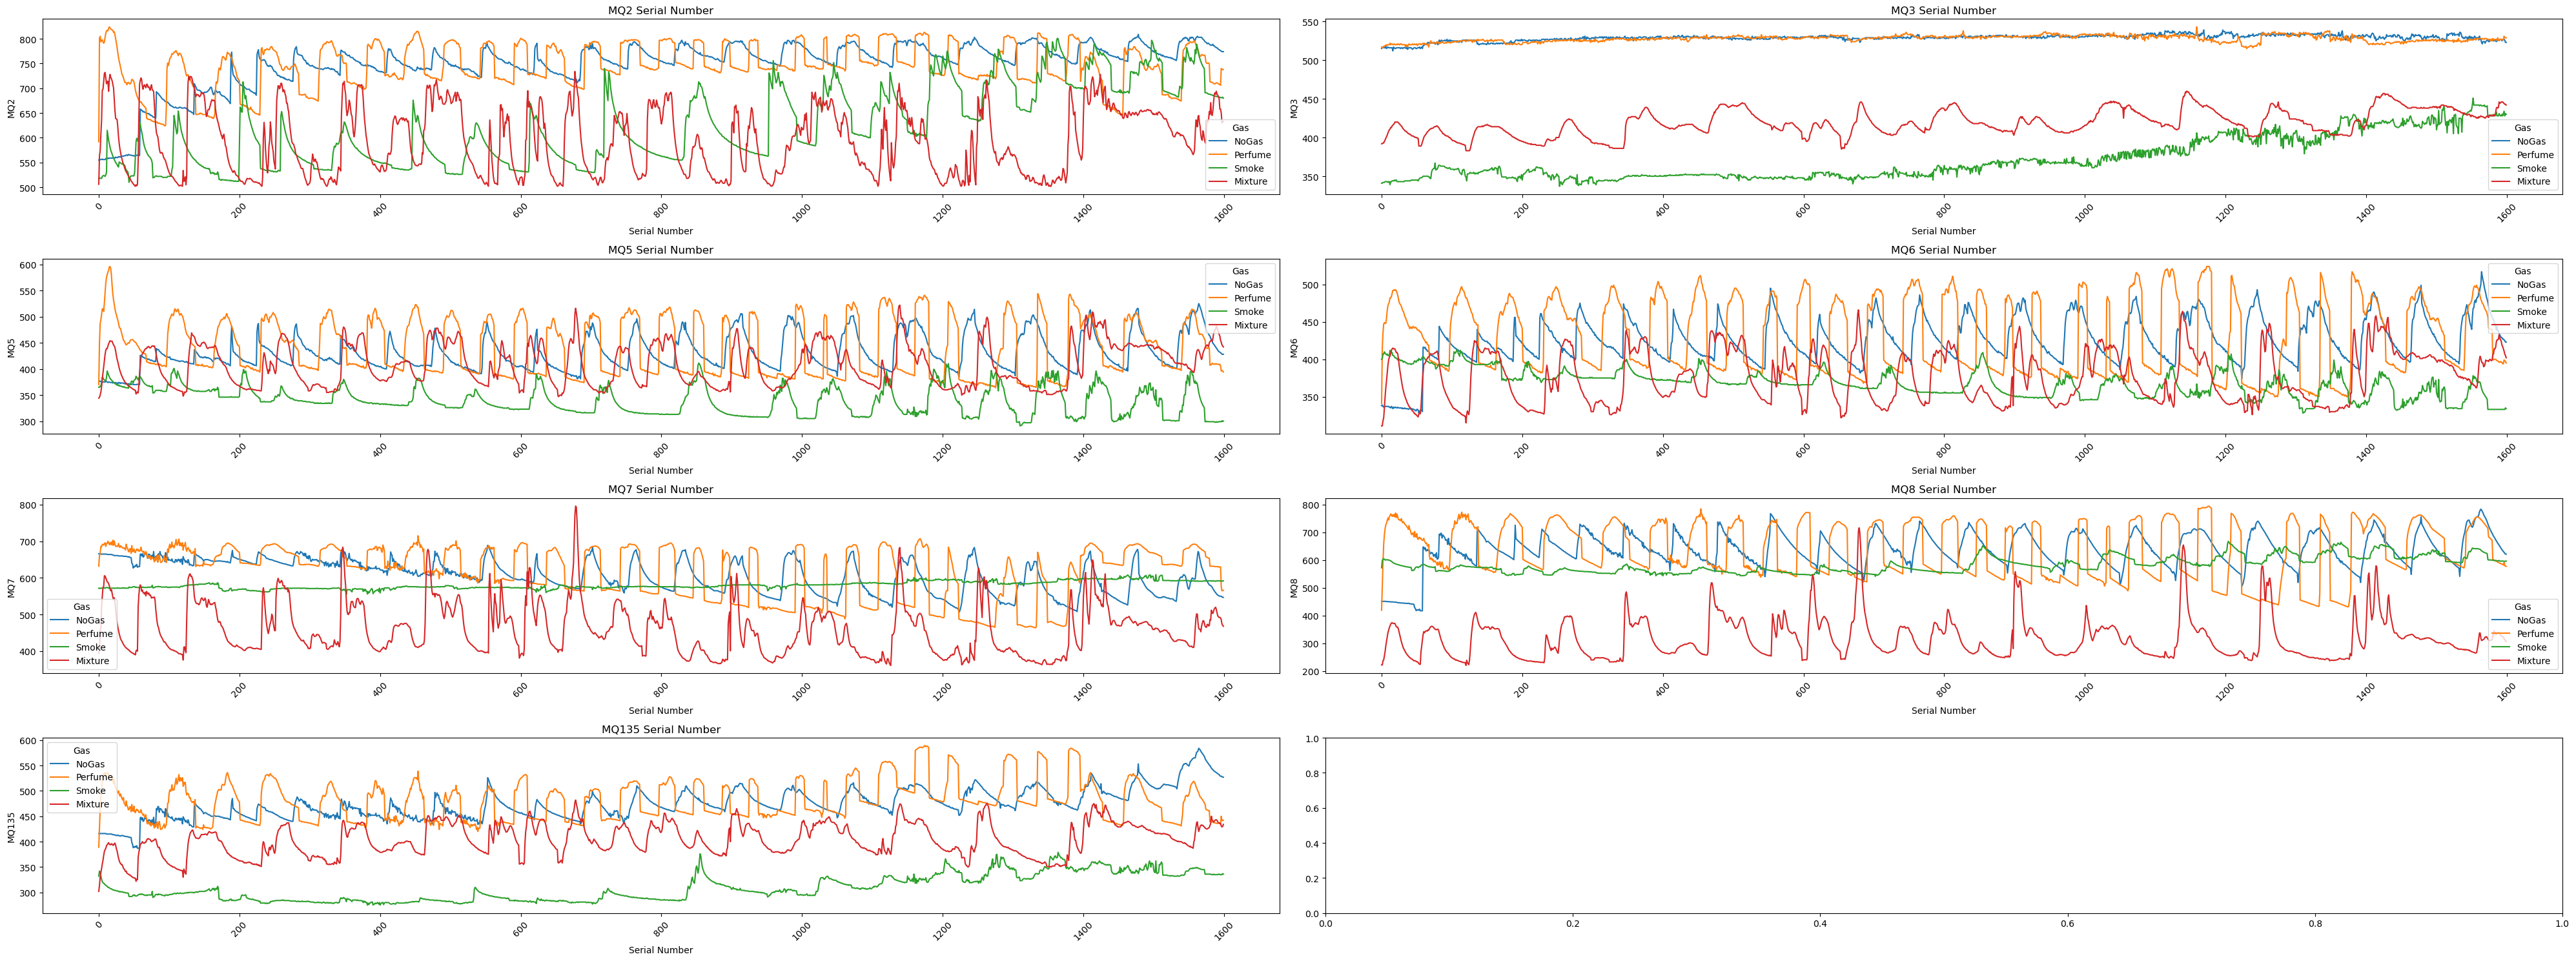

In [9]:
fig, axes = plt.subplots(4, 2, figsize=(40, 15))
axes = axes.ravel() # 넘파이 배열 1차원 flat 해주는

for i, sensor in enumerate(sensor_cols):
    sns.lineplot(data=df, x=df['Serial Number'], y=sensor, hue='Gas', ax=axes[i])
    axes[i].set_title(f"{sensor} Serial Number")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


처리 중인 센서: MQ2
시계열 데이터 구간 분할 실행...
전체 데이터 길이: 1600
데이터 범위: 592.0000 ~ 824.0000
사용된 prominence: 1.0000
감지된 최저값 개수: 32
경계점 312에서 급격한 변화 감지 (변화량: 47.00, 시도: 1/2)
  -> 경계점을 312에서 311로 이동 (새 변화량: 1.00)
경계점 590에서 급격한 변화 감지 (변화량: 84.00, 시도: 1/2)
  -> 경계점을 590에서 589로 이동 (새 변화량: 1.00)
경계점 741에서 급격한 변화 감지 (변화량: 65.00, 시도: 1/2)
  -> 경계점을 741에서 740로 이동 (새 변화량: 1.00)
경계점 1396에서 급격한 변화 감지 (변화량: 18.00, 시도: 1/2)
  -> 이동해도 개선되지 않음 (새 변화량: 80.00)
경계점 1539에서 급격한 변화 감지 (변화량: 47.00, 시도: 1/2)
  -> 경계점을 1539에서 1538로 이동 (새 변화량: 1.00)
경계점 1595에서 급격한 변화 감지 (변화량: 34.00, 시도: 1/2)
  -> 경계점을 1595에서 1594로 이동 (새 변화량: 2.00)
1차 시도 결과: 27개 구간 생성

구간 분할 결과 요약 (표 형태)
구간     시작     종료     길이     최솟값      최댓값      평균값      종료-1값      종료값      종료+1값     
------------------------------------------------------------------------------------------------------------------------
0      0      94     95     592.0    824.0    710.6    625.000    624.000  625.000   
1      95     163    69     625.0    776.0    705.0    641.000    63

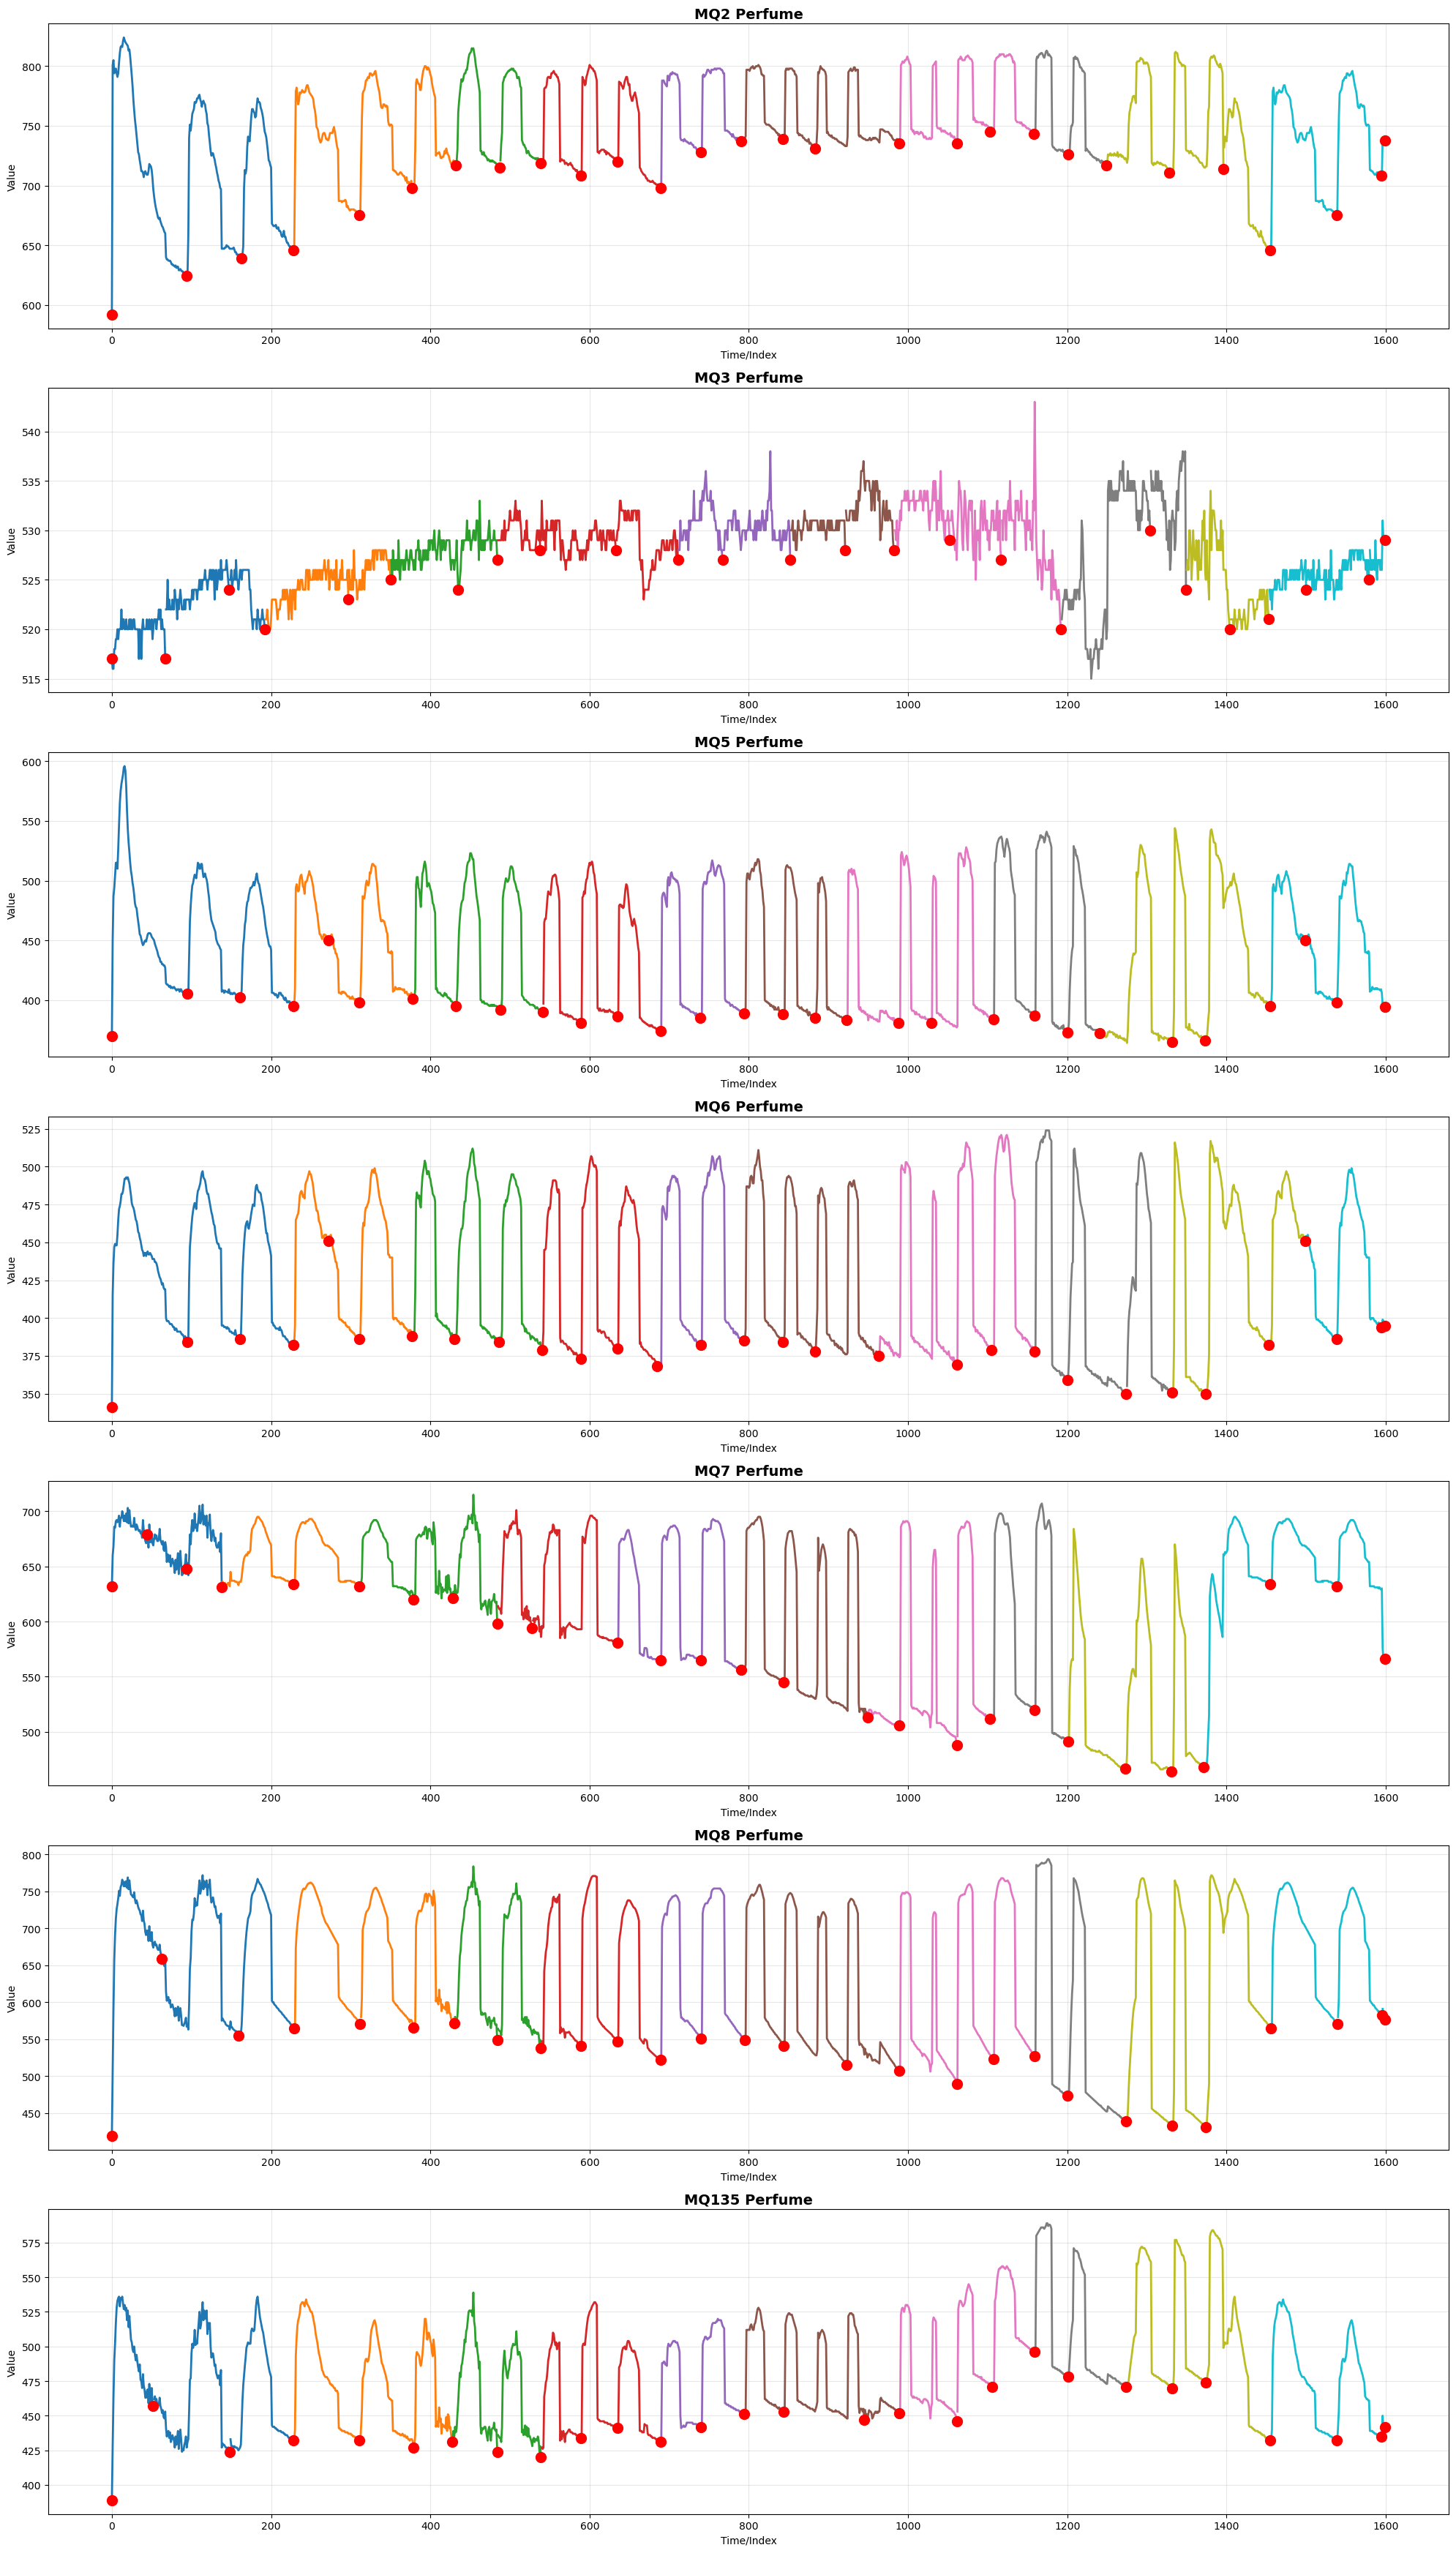


라벨이 추가된 데이터프레임 생성 완료!
labeled_df 변수에 저장되었습니다.


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')

def segment_timeseries_by_minima(data, min_distance=10, prominence=None, 
                               min_segment_length=50, max_segments=None, 
                               prominence_percentile=80, use_adaptive_prominence=True):
    """
    시계열 데이터를 최저값 기준으로 구간을 나누어 라벨링
    
    Parameters:
    data: array-like, 시계열 데이터
    min_distance: int, 최저값 간 최소 거리
    prominence: float, 최저값의 prominence (None이면 자동 계산)
    min_segment_length: int, 최소 구간 길이
    max_segments: int, 최대 구간 수 제한 (None이면 제한 없음)
    prominence_percentile: float, prominence 자동 계산 시 사용할 백분위수
    use_adaptive_prominence: bool, 적응적 prominence 사용 여부
    
    Returns:
    segments: dict, 각 구간의 정보
    labels: array, 각 데이터 포인트의 라벨
    """
    
    # 데이터를 numpy 배열로 변환
    if isinstance(data, pd.Series):
        values = data.values
        index = data.index
    else:
        values = np.array(data)
        index = np.arange(len(values))
    
    # 적응적 prominence 계산 (더 민감하게)
    if prominence is None:
        if use_adaptive_prominence:
            # 여러 방법으로 prominence 후보 계산
            std_based = np.std(values) * 0.3  # 표준편차 기반 (더 민감하게)
            diff_based = np.percentile(np.abs(np.diff(values)), prominence_percentile)
            range_based = (np.max(values) - np.min(values)) * 0.05  # 범위의 5%
            
            # 가장 작은 값 선택 (더 많은 최저값 감지)
            prominence_candidates = [std_based, diff_based, range_based]
            prominence = min([p for p in prominence_candidates if p > 0])
        else:
            data_range = np.max(values) - np.min(values)
            prominence = data_range * 0.05
    
    print(f"사용된 prominence: {prominence:.4f}")
    
    # 최저값 찾기 (데이터를 뒤집어서 최고값 찾기 알고리즘 사용)
    inverted_data = -values
    
    # 여러 prominence 값으로 시도
    prominence_multipliers = [0.5, 0.7, 1.0, 1.2, 1.5, 2.0] if use_adaptive_prominence else [1.0]
    
    best_minima = []
    best_score = float('inf')
    
    for multiplier in prominence_multipliers:
        current_prominence = prominence * multiplier
        
        try:
            minima_indices, properties = find_peaks(
                inverted_data, 
                distance=min_distance,
                prominence=current_prominence,
                height=-np.inf  # 모든 높이의 최저값 허용
            )
            
            # 최저값이 없으면 다음 multiplier 시도
            if len(minima_indices) == 0:
                continue
            
            # 경계점 추가
            temp_boundaries = [0] + list(minima_indices) + [len(values) - 1]
            temp_boundaries = sorted(set(temp_boundaries))
            
            # 구간 길이 체크
            segment_lengths = [temp_boundaries[i+1] - temp_boundaries[i] 
                             for i in range(len(temp_boundaries) - 1)]
            
            # 너무 짧은 구간의 개수 계산
            short_segments = sum(1 for length in segment_lengths if length < min_segment_length)
            num_segments = len(temp_boundaries) - 1
            
            # 스코어 계산 (구간 수와 짧은 구간 수를 고려)
            if max_segments is not None and num_segments > max_segments:
                score = float('inf')  # 너무 많은 구간
            else:
                score = short_segments * 10 + abs(num_segments - 6)  # 6개 구간을 목표로
            
            if score < best_score:
                best_score = score
                best_minima = minima_indices.copy()
                
        except Exception as e:
            continue
    
    # 최선의 결과가 없으면 기본값 사용
    if len(best_minima) == 0:
        print("경고: 최저값을 찾지 못했습니다. 기본 분할 사용.")
        # 균등 분할로 대체
        n_segments = 4
        segment_size = len(values) // n_segments
        best_minima = [i * segment_size for i in range(1, n_segments)]
        best_minima = [idx for idx in best_minima if 0 < idx < len(values) - 1]
    
    print(f"감지된 최저값 개수: {len(best_minima)}")
    
    # 최소 구간 길이 조정
    boundary_indices = [0] + list(best_minima) + [len(values) - 1]
    boundary_indices = sorted(set(boundary_indices))
    
    # 너무 짧은 구간 병합
    if min_segment_length > 0:
        i = 0
        while i < len(boundary_indices) - 1:
            current_start = boundary_indices[i]
            next_boundary = boundary_indices[i + 1]
            segment_length = next_boundary - current_start
            
            if segment_length < min_segment_length and i < len(boundary_indices) - 2:
                # 다음 구간과 합치기
                boundary_indices.pop(i + 1)
                continue
            else:
                i += 1
    
    # 종료점 앞뒤 값 튀는 현상 조정 (10 이상 차이나면 종료점 이동, 최대 2번 시도)
    adjusted_boundaries = boundary_indices.copy()
    
    for i in range(1, len(adjusted_boundaries) - 1):  # 첫번째와 마지막 경계는 제외
        current_end_idx = adjusted_boundaries[i]
        threshold = 10  # 초기 임계값
        
        # 최대 2번까지 이동 시도
        for attempt in range(2):
            if current_end_idx > 0 and current_end_idx + 1 < len(values):
                end_val = values[current_end_idx]
                end_plus_1_val = values[current_end_idx + 1]
                change_after = abs(end_plus_1_val - end_val)
                
                # 임계값 이상 튀는 경우 조정
                if change_after >= threshold:
                    print(f"경계점 {current_end_idx}에서 급격한 변화 감지 (변화량: {change_after:.2f}, 시도: {attempt + 1}/2)")
                    
                    # 앞으로 한 칸 이동해서 확인
                    if current_end_idx - 1 > adjusted_boundaries[i-1]:
                        new_end_idx = current_end_idx - 1
                        if new_end_idx + 1 < len(values):
                            new_change_after = abs(values[new_end_idx + 1] - values[new_end_idx])
                            
                            if new_change_after < change_after:
                                print(f"  -> 경계점을 {current_end_idx}에서 {new_end_idx}로 이동 (새 변화량: {new_change_after:.2f})")
                                current_end_idx = new_end_idx
                                adjusted_boundaries[i] = current_end_idx
                                continue  # 다음 시도로
                            else:
                                print(f"  -> 이동해도 개선되지 않음 (새 변화량: {new_change_after:.2f})")
                        else:
                            print(f"  -> 더 이상 이동할 수 없음")
                    else:
                        print(f"  -> 이전 경계점과 겹쳐서 이동할 수 없음")
                    
                    # 2번 시도해도 안되면 임계값을 15로 올림
                    if attempt == 1:
                        threshold = 15
                        print(f"  -> 2번 이동해도 개선되지 않아 임계값을 15로 상향 조정")
                        final_change = abs(values[current_end_idx + 1] - values[current_end_idx]) if current_end_idx + 1 < len(values) else 0
                        if final_change < threshold:
                            print(f"  -> 임계값 15 기준으로는 정상 (변화량: {final_change:.2f})")
                        else:
                            print(f"  -> 임계값 15로도 여전히 급격함 (변화량: {final_change:.2f})")
                    break
                else:
                    # 임계값 이하면 정상
                    break
    
    # 구간 정보와 라벨 생성
    segments = {}
    labels = np.zeros(len(values), dtype=int)
    
    for i in range(len(adjusted_boundaries) - 1):
        start_idx = adjusted_boundaries[i] + (1 if i > 0 else 0)  # 시작점은 종료점보다 하나 크게 (첫 구간 제외)
        end_idx = adjusted_boundaries[i + 1]
        
        segment_data = values[start_idx:end_idx + 1]
        segment_index = index[start_idx:end_idx + 1]
        
        segments[f'segment_{i}'] = {
            'start_index': start_idx,
            'end_index': end_idx,
            'start_time': segment_index[0],
            'end_time': segment_index[-1],
            'length': len(segment_data),
            'min_value': np.min(segment_data),
            'max_value': np.max(segment_data),
            'mean_value': np.mean(segment_data),
            'data': segment_data,
            'time_index': segment_index
        }
        
        # 라벨 할당
        labels[start_idx:end_idx + 1] = i
    
    return segments, labels, adjusted_boundaries

def plot_segmented_timeseries(data, segments, labels, boundary_indices, title="시계열 데이터 구간 분할", ax=None):
    """
    구간 분할된 시계열 데이터 시각화
    """
    if ax is None:
        plt.figure(figsize=(20, 10))
        ax = plt.gca()
    
    # 데이터 인덱스 설정
    if isinstance(data, pd.Series):
        x = data.index
        y = data.values
    else:
        x = np.arange(len(data))
        y = np.array(data)
    
    # 각 구간을 다른 색상으로 표시
    colors = plt.cm.tab10(np.linspace(0, 1, len(segments)))
    
    for i, (seg_name, seg_info) in enumerate(segments.items()):
        start = seg_info['start_index']
        end = seg_info['end_index']
        ax.plot(x[start:end+1], y[start:end+1], 
                color=colors[i], linewidth=2, 
                label=f'구간 {i} (길이: {seg_info["length"]})')
    
    # 최저값 지점 표시
    ax.scatter(x[boundary_indices], y[boundary_indices], 
               color='red', s=100, zorder=5, 
               label='구간 경계 (최저값)')
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Time/Index')
    ax.set_ylabel('Value')
    # ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # legend 제거
    ax.grid(True, alpha=0.3)

def print_segment_summary(segments, original_data=None):
    """
    구간 정보 요약을 표 형태로 출력 (종료점 앞뒤 값 포함)
    """
    if isinstance(original_data, pd.Series):
        values = original_data.values
    elif original_data is not None:
        values = np.array(original_data)
    else:
        values = None
    
    print("\n구간 분할 결과 요약 (표 형태)")
    print("=" * 120)
    print(f"{'구간':<6} {'시작':<6} {'종료':<6} {'길이':<6} {'최솟값':<8} {'최댓값':<8} {'평균값':<8} {'종료-1값':<10} {'종료값':<8} {'종료+1값':<10}")
    print("-" * 120)
    
    for seg_name, seg_info in segments.items():
        seg_num = seg_name.split('_')[1]
        start_idx = seg_info['start_index']
        end_idx = seg_info['end_index']
        
        # 종료점 앞뒤 값 계산
        if values is not None:
            # 종료점 이전 값 (종료점-1)
            end_minus_1_val = values[end_idx - 1] if end_idx > 0 else "N/A"
            # 종료점 값
            end_val = values[end_idx] if end_idx < len(values) else "N/A"
            # 종료점 이후 값 (종료점+1)
            end_plus_1_val = values[end_idx + 1] if end_idx + 1 < len(values) else "N/A"
        else:
            end_minus_1_val = end_val = end_plus_1_val = "N/A"
        
        # 값 포맷팅
        def format_val(val):
            if isinstance(val, (int, float, np.number)):
                return f"{val:.3f}"
            else:
                return str(val)
        
        print(f"{seg_num:<6} {start_idx:<6} {end_idx:<6} "
              f"{seg_info['length']:<6} {seg_info['min_value']:<8.1f} "
              f"{seg_info['max_value']:<8.1f} {seg_info['mean_value']:<8.1f} "
              f"{format_val(end_minus_1_val):<10} {format_val(end_val):<8} {format_val(end_plus_1_val):<10}")
    
    print("=" * 120)
    
    # 종료점 앞뒤 값의 변화량 분석
    if values is not None:
        print("\n=== 구간 종료점 변화량 분석 ===")
        print(f"{'구간':<6} {'종료-1→종료':<15} {'종료→종료+1':<15} {'급격한변화':<10}")
        print("-" * 50)
        
        for seg_name, seg_info in segments.items():
            seg_num = seg_name.split('_')[1]
            end_idx = seg_info['end_index']
            
            # 변화량 계산
            if end_idx > 0:
                change_before = values[end_idx] - values[end_idx - 1]
                change_before_str = f"{change_before:+.3f}"
            else:
                change_before_str = "N/A"
            
            if end_idx + 1 < len(values):
                change_after = values[end_idx + 1] - values[end_idx]
                change_after_str = f"{change_after:+.3f}"
                
                # 급격한 변화 감지 (최종 임계값 15 적용)
                is_abrupt = abs(change_after) >= 15
                abrupt_str = "급격함!" if is_abrupt else "정상"
            else:
                change_after_str = "N/A"
                abrupt_str = "N/A"
            
            print(f"{seg_num:<6} {change_before_str:<15} {change_after_str:<15} {abrupt_str:<10}")
        
        print("=" * 50)

# 메인 실행 부분 - 수정된 버전
def process_sensor_data(df, sensor_cols, gas_type='Perfume'):
    """
    센서 데이터를 처리하는 함수
    """
    # 가스 유형에 따른 데이터 필터링
    filtered_df = df[df['Gas'] == gas_type]
    
    # 플롯 설정
    fig, axes = plt.subplots(len(sensor_cols), 1, figsize=(20, 5 * len(sensor_cols)))
    if len(sensor_cols) == 1:
        axes = [axes]  # 단일 subplot인 경우 리스트로 만들기
    
    results = {}
    
    for i, sensor in enumerate(sensor_cols):
        print(f"\n{'='*50}")
        print(f"처리 중인 센서: {sensor}")
        print(f"{'='*50}")
        
        # 각 센서별로 시계열 데이터 생성 (1차원 데이터)
        ts_data = pd.Series(filtered_df[sensor].values, index=filtered_df["Serial Number"])
        
        print(f"시계열 데이터 구간 분할 실행...")
        print(f"전체 데이터 길이: {len(ts_data)}")
        print(f"데이터 범위: {ts_data.min():.4f} ~ {ts_data.max():.4f}")
        
        # 구간 분할 실행 (주기적 패턴에 최적화)
        data_length = len(ts_data)
        
        # 1차 시도: 더욱 세밀하게 모든 주기 감지
        segments, labels, boundary_indices = segment_timeseries_by_minima(
            ts_data, 
            min_distance=max(data_length // 50, 5),     # 훨씬 더 작은 거리 (매우 민감하게)
            prominence=None,                            # 자동 계산
            min_segment_length=max(data_length // 40, 10),  # 훨씬 더 작은 최소 구간 길이
            max_segments=None,                          # 구간 수 제한 해제
            prominence_percentile=30,                   # 매우 민감한 prominence
            use_adaptive_prominence=True                # 적응적 prominence 사용
        )
        
        print(f"1차 시도 결과: {len(segments)}개 구간 생성")
        
        # 구간이 너무 적으면 극도로 민감하게 재시도
        if len(segments) < 10:
            print("구간이 적어서 극도로 민감하게 재시도...")
            segments, labels, boundary_indices = segment_timeseries_by_minima(
                ts_data, 
                min_distance=max(data_length // 80, 3),     # 극도로 작은 거리
                prominence=None,
                min_segment_length=max(data_length // 60, 5),
                max_segments=None,
                prominence_percentile=20,                    # 극도로 민감한 prominence
                use_adaptive_prominence=True
            )
        
        # 결과 저장
        results[sensor] = {
            'segments': segments,
            'labels': labels,
            'boundary_indices': boundary_indices,
            'ts_data': ts_data
        }
        
        # 결과 출력 (원본 데이터 전달)
        print_segment_summary(segments, ts_data)
        
        # 시각화
        plot_segmented_timeseries(ts_data, segments, labels, boundary_indices, 
                                title=f"{sensor} {gas_type}", ax=axes[i])
        
        # 라벨 정보 출력
        # print(f"\n생성된 라벨 수: {len(np.unique(labels))}")
        # print(f"각 라벨별 데이터 포인트 수:")
        # unique_labels, counts = np.unique(labels, return_counts=True)
        # for label, count in zip(unique_labels, counts):
        #     print(f"  라벨 {label}: {count}개")
        
        # 각 구간별 통계 요약
        print(f"\n=== 각 구간별 {sensor} 센서값 통계 ===")
        for j in range(len(segments)):
            segment_mask = labels == j
            segment_data = ts_data[segment_mask]
            print(f"구간 {j}: 평균={segment_data.mean():.4f}, 표준편차={segment_data.std():.4f}, "
                  f"최솟값={segment_data.min():.4f}, 최댓값={segment_data.max():.4f}")
    
    plt.tight_layout()
    plt.show()
    
    return results

# 사용 예시 (수정된 메인 실행 부분)
if __name__ == "__main__":
    # sensor_cols와 df가 정의되어 있다고 가정
    # sensor_cols = ['MQ2', 'MQ3', 'MQ4', 'MQ5', 'MQ6', 'MQ7', 'MQ8']  # 예시
    
    # 모든 센서에 대해 처리
    results = process_sensor_data(df, sensor_cols, gas_type='Perfume')
    
    # 라벨된 데이터를 원본 데이터프레임에 추가하기 (선택사항)
    labeled_df = df[df['Gas'] == 'Perfume'].copy()
    
    # 각 센서별로 라벨 추가 
    for sensor in sensor_cols:
        if sensor in results:
            labeled_df[f'{sensor}_segment_label'] = results[sensor]['labels']
    
    print(f"\n라벨이 추가된 데이터프레임 생성 완료!")
    print("labeled_df 변수에 저장되었습니다.")

# 실제 데이터 사용 예시
def process_your_data(your_data, min_segments=3, max_segments=8):
    """
    실제 데이터를 처리하는 함수 예시 (더 큰 구간으로 나누기)
    """
    # your_data: 당신의 시계열 데이터 (list, numpy array, pandas Series 등)
    
    data_length = len(your_data)
    
    segments, labels, boundary_indices = segment_timeseries_by_minima(
        your_data,
        min_distance=max(data_length // 20, 10),    # 데이터 길이의 5% 또는 최소 10
        prominence=None,                             # 자동 계산
        min_segment_length=data_length // 15,        # 데이터 길이의 약 6.7%
        max_segments=max_segments,                   # 최대 구간 수 제한
        prominence_percentile=85                     # 보수적인 prominence
    )
    
    # 만약 구간이 너무 적으면 더 세밀하게 나누기
    if len(segments) < min_segments:
        segments, labels, boundary_indices = segment_timeseries_by_minima(
            your_data,
            min_distance=max(data_length // 30, 5),
            prominence=None,
            min_segment_length=data_length // 25,
            max_segments=max_segments,
            prominence_percentile=70
        )
    
    # 결과를 DataFrame으로 저장 (선택사항)
    result_df = pd.DataFrame({
        'value': your_data if not isinstance(your_data, pd.Series) else your_data.values,
        'segment_label': labels
    })
    
    return segments, labels, boundary_indices, result_df

# 추가: 주기적 패턴 전용 구간 분할 함수
def detect_periodic_minima(data, expected_periods=None, min_distance_ratio=0.02):
    """
    주기적 패턴의 최저값을 더 정확하게 감지하는 함수
    
    Parameters:
    data: 시계열 데이터
    expected_periods: 예상 주기 수 (None이면 자동 추정)
    min_distance_ratio: 데이터 길이 대비 최저값 간 최소 거리 비율
    """
    if isinstance(data, pd.Series):
        values = data.values
        index = data.index
    else:
        values = np.array(data)
        index = np.arange(len(values))
    
    data_length = len(values)
    min_distance = max(int(data_length * min_distance_ratio), 5)
    
    # 데이터를 스무딩하여 노이즈 제거
    from scipy.ndimage import uniform_filter1d
    smoothed_values = uniform_filter1d(values, size=max(3, data_length // 100))
    
    # 여러 prominence 값으로 시도
    inverted_data = -smoothed_values
    prominence_values = []
    
    # prominence 후보들 계산
    std_val = np.std(values)
    range_val = np.max(values) - np.min(values)
    diff_percentiles = [np.percentile(np.abs(np.diff(values)), p) for p in [30, 50, 70]]
    
    prominence_candidates = [
        std_val * 0.1, std_val * 0.2, std_val * 0.3,
        range_val * 0.02, range_val * 0.05, range_val * 0.1,
    ] + diff_percentiles
    
    best_result = None
    best_score = float('inf')
    
    for prom in prominence_candidates:
        if prom <= 0:
            continue
            
        try:
            minima_indices, properties = find_peaks(
                inverted_data,
                distance=min_distance,
                prominence=prom,
                height=-np.inf
            )
            
            if len(minima_indices) == 0:
                continue
            
            # 실제 원본 데이터에서의 값들 확인
            minima_values = values[minima_indices]
            
            # 주기성 점수 계산
            if len(minima_indices) >= 3:
                # 간격의 일관성 체크
                intervals = np.diff(minima_indices)
                interval_std = np.std(intervals)
                interval_mean = np.mean(intervals)
                regularity_score = interval_std / (interval_mean + 1e-6)
                
                # 최저값들의 값 일관성 체크
                value_std = np.std(minima_values)
                value_consistency = value_std / (np.std(values) + 1e-6)
                
                # 전체 점수 (낮을수록 좋음)
                score = regularity_score + value_consistency * 0.5
                
                if expected_periods is not None:
                    # 예상 주기 수와의 차이도 고려
                    period_diff = abs(len(minima_indices) - expected_periods)
                    score += period_diff * 0.1
                
                if score < best_score:
                    best_score = score
                    best_result = {
                        'minima_indices': minima_indices,
                        'prominence': prom,
                        'regularity_score': regularity_score,
                        'value_consistency': value_consistency,
                        'intervals': intervals
                    }
        except:
            continue
    
    if best_result is None:
        print("주기적 패턴을 감지하지 못했습니다. 기본 방법 사용.")
        return segment_timeseries_by_minima(data, min_distance=min_distance)
    
    # print(f"최적 prominence: {best_result['prominence']:.4f}")
    # print(f"감지된 주기: {len(best_result['minima_indices'])}개")
    # print(f"평균 간격: {np.mean(best_result['intervals']):.1f}")
    # print(f"간격 표준편차: {np.std(best_result['intervals']):.1f}")
    
    # 경계점 설정
    boundary_indices = [0] + list(best_result['minima_indices']) + [len(values) - 1]
    boundary_indices = sorted(set(boundary_indices))
    
    # 구간 정보 생성
    segments = {}
    labels = np.zeros(len(values), dtype=int)
    
    for i in range(len(boundary_indices) - 1):
        start_idx = boundary_indices[i]
        end_idx = boundary_indices[i + 1]
        
        segment_data = values[start_idx:end_idx + 1]
        segment_index = index[start_idx:end_idx + 1]
        
        segments[f'segment_{i}'] = {
            'start_index': start_idx,
            'end_index': end_idx,
            'start_time': segment_index[0],
            'end_time': segment_index[-1],
            'length': len(segment_data),
            'min_value': np.min(segment_data),
            'max_value': np.max(segment_data),
            'mean_value': np.mean(segment_data),
            'data': segment_data,
            'time_index': segment_index
        }
        
        labels[start_idx:end_idx + 1] = i
    
    return segments, labels, boundary_indices

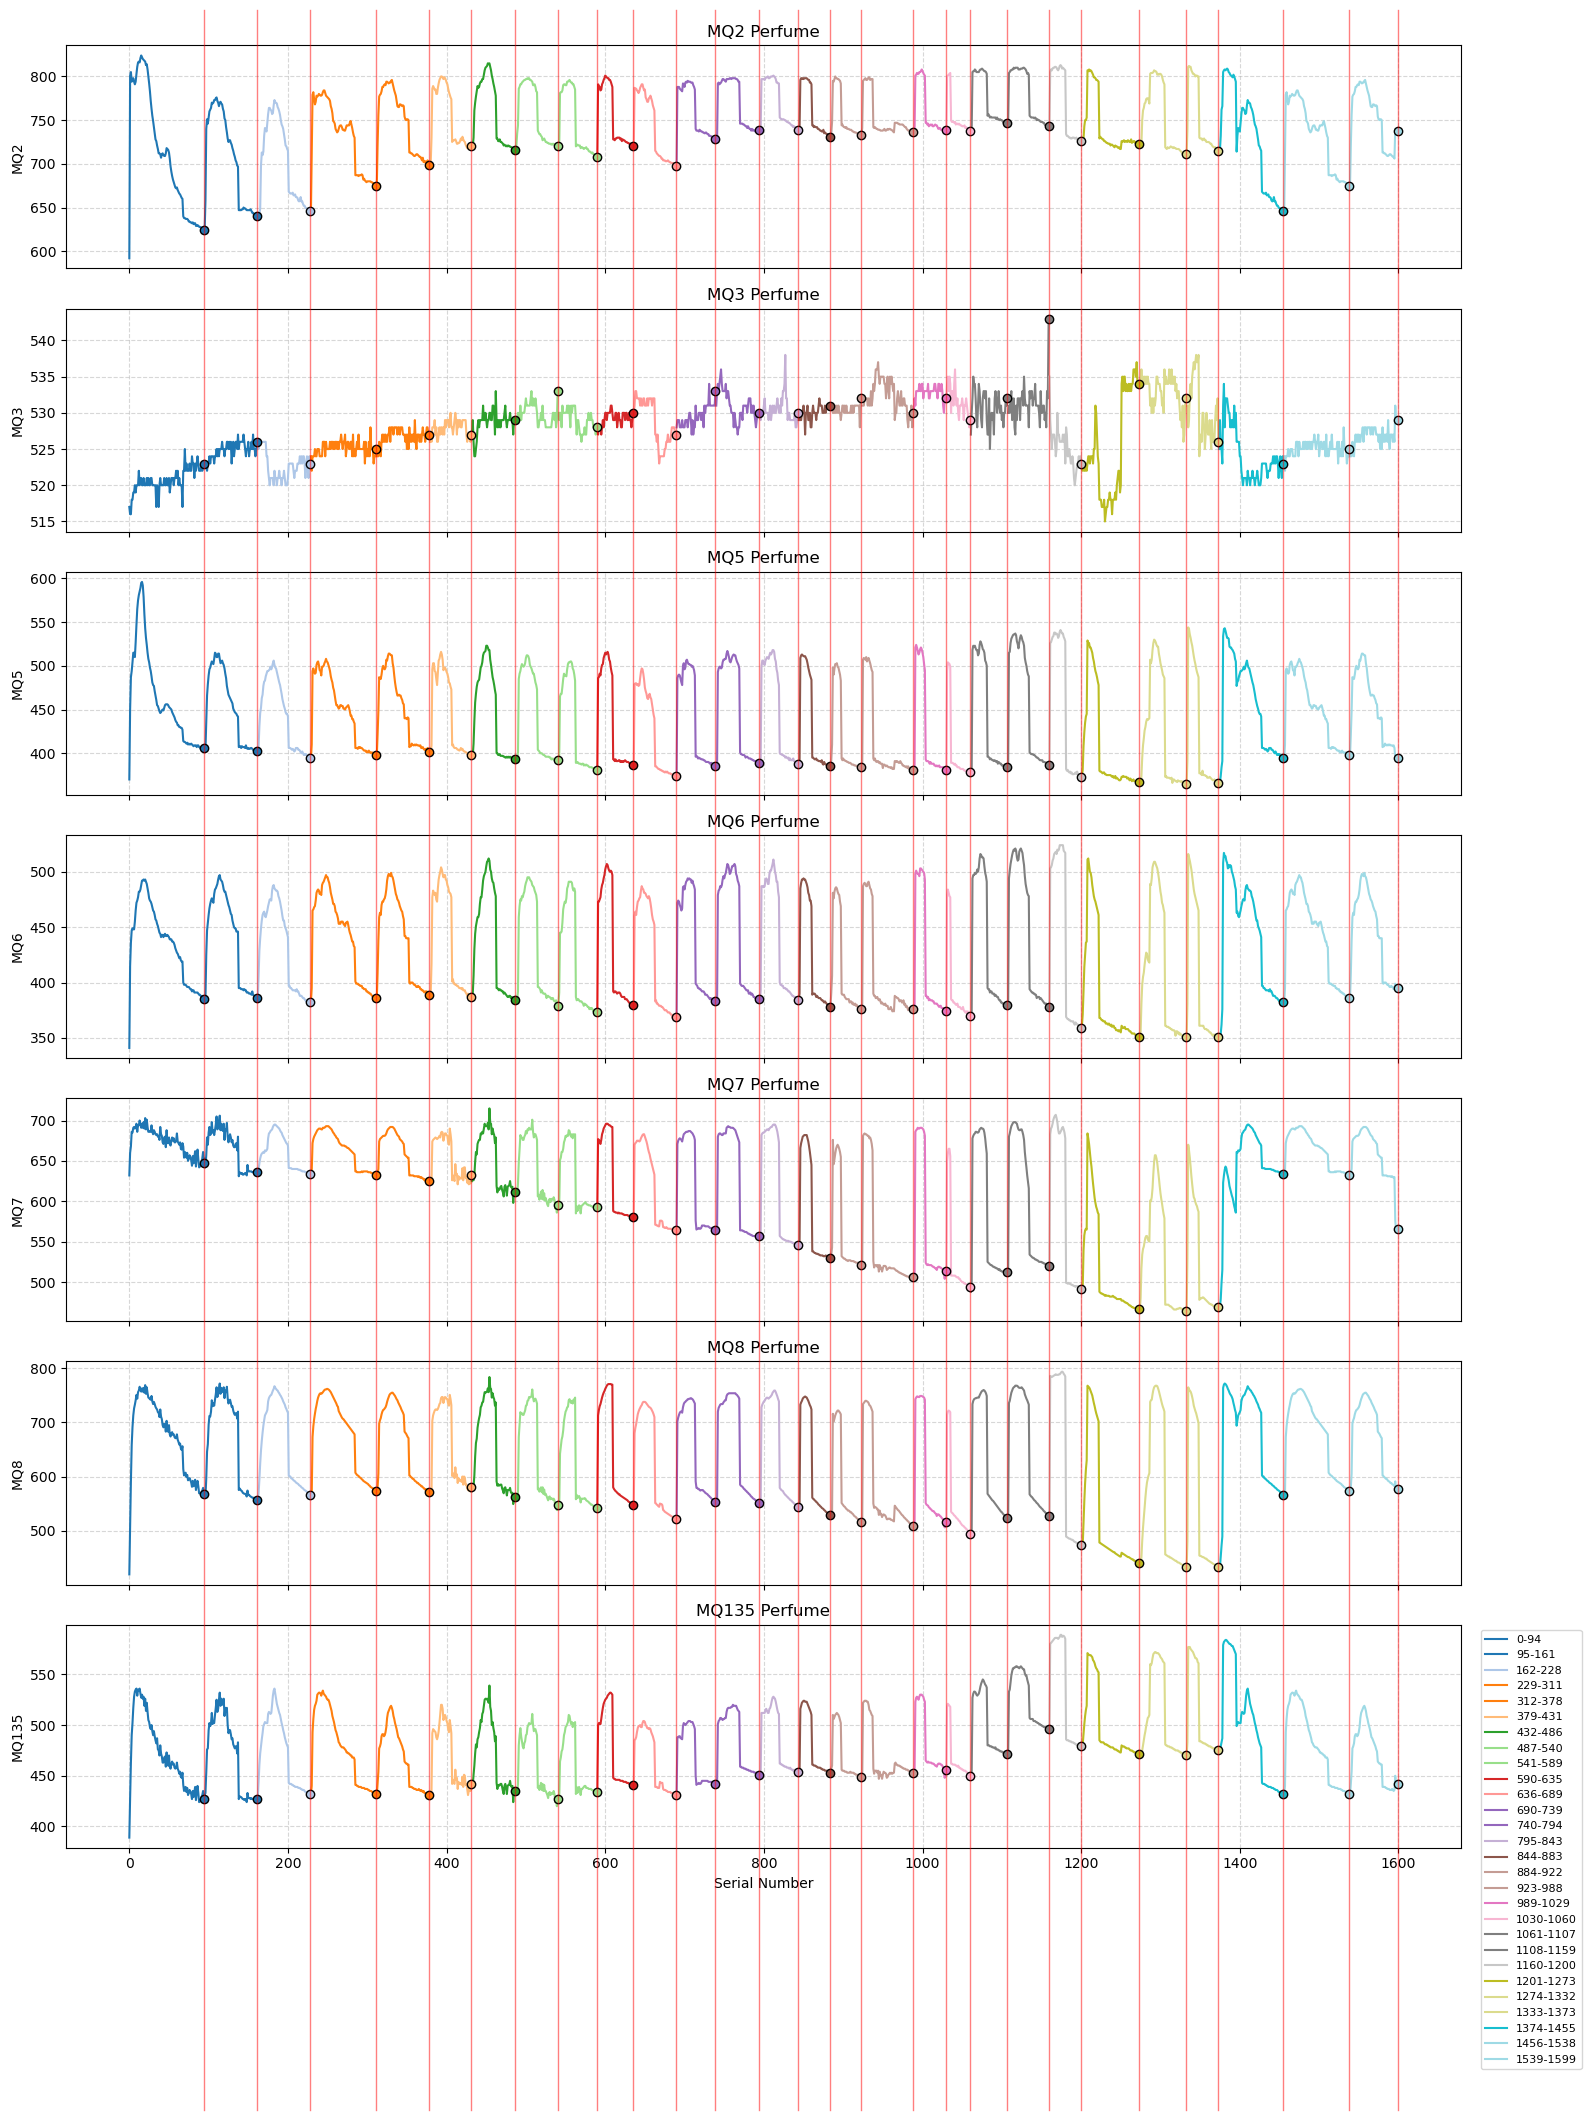

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

# 센서 컬럼 리스트
sensor_columns = ['MQ2', 'MQ3', 'MQ5', 'MQ6', 'MQ7', 'MQ8', 'MQ135']
# 구간 정보
ranges = [
    (0, 94), (95, 161), (162, 228), (229, 311), (312, 378), (379, 431),
    (432, 486), (487, 540), (541, 589), (590, 635), (636, 689), (690, 739),
    (740, 794), (795, 843), (844, 883), (884, 922), (923, 988), (989, 1029),
    (1030, 1060), (1061, 1107), (1108, 1159), (1160, 1200), (1201, 1273),
    (1274, 1332), (1333, 1373), (1374, 1455), (1456, 1538), (1539, 1599)
]
# 색상 리스트 생성
cmap = plt.cm.get_cmap('tab20', len(ranges))
# subplot 생성
fig, axes = plt.subplots(nrows=len(sensor_columns), ncols=1, figsize=(16, 3 * len(sensor_columns)), sharex=True)

for i, sensor in enumerate(sensor_columns):
    ax = axes[i]
    for idx, (start, end) in enumerate(ranges):
        segment = df_perfume[(df_perfume['Serial Number'] >= start) & (df_perfume['Serial Number'] <= end)]
        ax.plot(segment['Serial Number'], segment[sensor], color=cmap(idx), label=f'{start}-{end}')
        
        # 종료 지점 scatter
        if end in df_perfume['Serial Number'].values:
            end_value = df_perfume.loc[df_perfume['Serial Number'] == end, sensor].values[0]
            ax.scatter(end, end_value, color=cmap(idx), edgecolor='black', zorder=5)
    
    ax.set_title(f"{sensor} Perfume")
    ax.set_ylabel(sensor)
    ax.grid(True, linestyle='--', alpha=0.5)

# 공통 X축 라벨
axes[-1].set_xlabel("Serial Number")
# 범례는 마지막 subplot에만 추가
axes[-1].legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=8)

# 레이아웃 먼저 조정
plt.tight_layout()

# 전체 figure를 관통하는 수직선들 추가 (각 구간의 종료점에)
for range_info in ranges:
    line_x = range_info[1]  # 구간 종료점
    
    # 첫 번째 subplot에서 데이터 좌표를 figure 좌표로 변환
    x_display = axes[0].transData.transform([(line_x, 0)])[0][0]
    x_fig = fig.transFigure.inverted().transform([(x_display, 0)])[0][0]
    
    # figure에 수직선 추가 (전체 높이)
    line = mlines.Line2D([x_fig, x_fig], [0, 1], 
                         transform=fig.transFigure, 
                         color='red', linewidth=1, alpha=0.5)
    fig.add_artist(line)

# 기본 저장 (PNG 형식)
plt.savefig('perfume_sensor_plot.png')

plt.show()

In [17]:
df_perfume = df.loc[df['Gas']=='Perfume'].reset_index(drop=True)

# df_perfume.loc[df_perfume['Serial Number'].loc[1456:1538]]['MQ5'].mean()
df_perfume

Serial Number  MQ2  MQ3  MQ5  MQ6  MQ7  MQ8  MQ135      Gas  \
0                 0  592  517  370  341  632  419    389  Perfume   
1                 1  801  516  450  415  660  507    428  Perfume   
2                 2  805  516  487  436  668  591    463  Perfume   
3                 3  794  518  494  447  686  658    490  Perfume   
4                 4  796  518  504  449  685  691    502  Perfume   
...             ...  ...  ...  ...  ...  ...  ...    ...      ...   
1595           1595  706  526  406  394  630  582    436  Perfume   
1596           1596  740  531  396  399  576  591    450  Perfume   
1597           1597  738  529  397  398  565  579    441  Perfume   
1598           1598  738  529  396  397  566  579    442  Perfume   
1599           1599  738  529  394  395  566  577    442  Perfume   

     Corresponding Image Name  
0                   0_Perfume  
1                   1_Perfume  
2                   2_Perfume  
3                   3_Perfume  
4                   4_Perfume  
...                       ...  
1595             1595_Perfume  
1596             1596_Perfume  
1597             1597_Perfume  
1598             1598_Perfume  
1599             1599_Perfume  

[1600 rows x 10 columns]

In [18]:
import pandas as pd
import numpy as np

# 1. 센서 컬럼
sensor_columns = ['MQ2', 'MQ3', 'MQ5', 'MQ6', 'MQ7', 'MQ8', 'MQ135']

# 2. 구간 정의
ranges = [
    (0, 94), (95, 161), (162, 228), (229, 311), (312, 378), (379, 431),
    (432, 486), (487, 540), (541, 589), (590, 635), (636, 689), (690, 739),
    (740, 794), (795, 843), (844, 883), (884, 922), (923, 988), (989, 1029),
    (1030, 1060), (1061, 1107), (1108, 1159), (1160, 1200), (1201, 1273),
    (1274, 1332), (1333, 1373), (1374, 1455), (1456, 1538), (1539, 1599)
]

# 3. 결과 저장 리스트
results = []

# 4. 구간별로 반복하면서 각 센서의 통계 계산
for sensor in sensor_columns:
    for idx, (start, end) in enumerate(ranges):
        segment = df_perfume[(df_perfume['Serial Number'] >= start) & (df_perfume['Serial Number'] <= end)]

        # 통계값 계산
        min_val = segment[sensor].min()
        max_val = segment[sensor].max()
        mean_val = round(segment[sensor].mean(), 2)

        end_val = df_perfume.loc[df_perfume['Serial Number'] == end, sensor].values
        end_minus1_val = df_perfume.loc[df_perfume['Serial Number'] == end - 1, sensor].values
        end_plus1_val = df_perfume.loc[df_perfume['Serial Number'] == end + 1, sensor].values

        results.append({
            '센서': sensor,
            '구간': idx,
            '시작': start,
            '종료': end,
            '최솟값': min_val,
            '최댓값': max_val,
            '평균값': mean_val,
            '종료-1값': end_minus1_val[0] if len(end_minus1_val) else np.nan,
            '종료값': end_val[0] if len(end_val) else np.nan,
            '종료+1값': end_plus1_val[0] if len(end_plus1_val) else np.nan
        })

# 5. DataFrame으로 변환
df_summary = pd.DataFrame(results)

# 6. CSV로 저장
df_summary.to_csv("구간별_모든센서_요약.csv", index=False, encoding='utf-8-sig')

print("저장 완료: '구간별_모든센서_요약.csv'")

저장 완료: '구간별_모든센서_요약.csv'


In [31]:
# 1. 센서 컬럼
sensor_columns = ['MQ2', 'MQ3', 'MQ5', 'MQ6', 'MQ7', 'MQ8', 'MQ135']

# 2. 구간 정의
ranges = [
    (0, 94), (95, 161), (162, 228), (229, 311), (312, 378), (379, 431),
    (432, 486), (487, 540), (541, 589), (590, 635), (636, 689), (690, 739),
    (740, 794), (795, 843), (844, 883), (884, 922), (923, 988), (989, 1029),
    (1030, 1060), (1061, 1107), (1108, 1159), (1160, 1200), (1201, 1273),
    (1274, 1332), (1333, 1373), (1374, 1455), (1456, 1538), (1539, 1599)
]

for sequence in ranges[::-1]:
    end_point = sequence[1]
    new_row = pd.DataFrame({'Serial Number': 99999,
                            'MQ2': df_perfume['MQ2'].loc[df_perfume['Serial Number']==end_point],
                            'MQ3': df_perfume['MQ3'].loc[df_perfume['Serial Number']==end_point],
                            'MQ5': df_perfume['MQ5'].loc[df_perfume['Serial Number']==end_point],
                            'MQ6': df_perfume['MQ6'].loc[df_perfume['Serial Number']==end_point],
                            'MQ7': df_perfume['MQ7'].loc[df_perfume['Serial Number']==end_point],
                            'MQ8': df_perfume['MQ8'].loc[df_perfume['Serial Number']==end_point],
                            'MQ135': df_perfume['MQ135'].loc[df_perfume['Serial Number']==end_point],
                            'Gas': 'Perfume',
                            'Corresponding Image Name': df_perfume['Corresponding Image Name'].loc[df_perfume['Serial Number']==end_point]
                           })
    for _ in range(50):
        df_perfume = pd.concat([
            df_perfume.iloc[:end_point],
            new_row,
            df_perfume[end_point:]
            )]

1599
1538
1455
1373
1332
1273
1200
1159
1107
1060
1029
988
922
883
843
794
739
689
635
589
540
486
431
378
311
228
161
94


In [13]:
def remove_outliers_iqr(df, sensor_cols):
    cleaned_df = pd.DataFrame()
    
    for gas_class in df['Gas'].unique():
        df_gas = df[df['Gas'] == gas_class].copy()

        for col in sensor_cols:
            Q1 = df_gas[col].quantile(0.25)
            Q3 = df_gas[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # 이상치 제거
            df_gas = df_gas[(df_gas[col] >= lower_bound) & (df_gas[col] <= upper_bound)]
        
        cleaned_df = pd.concat([cleaned_df, df_gas], ignore_index=True)
    
    return cleaned_df

In [14]:
def remove_outliers_manual_decile(df, sensor_cols, sd_threshold=40):
    cleaned_df = pd.DataFrame()

    for gas_class in df['Gas'].unique():
        df_gas = df[df['Gas'] == gas_class].copy()
        for col in sensor_cols:
            # 반복적으로 이상치 제거
            while df_gas[col].std() > sd_threshold:
                percentiles = np.percentile(df_gas[col], np.arange(0, 101, 10))
                deltas = np.diff(percentiles)
                
                # max 이상치 판단
                max_gap = df_gas[col].max() - percentiles[9]
                if max_gap > 2 * np.mean(deltas):  # max와 90% 사이 격차가 너무 크면
                    df_gas = df_gas[df_gas[col] <= percentiles[9]]
                    continue
                
                # min 이상치 판단
                min_gap = percentiles[1] - df_gas[col].min()
                if min_gap > 2 * np.mean(deltas):  # 10%와 min 사이 격차가 너무 크면
                    df_gas = df_gas[df_gas[col] >= percentiles[1]]
                    continue
                
                break  # 더 이상 제거할 필요 없음

        cleaned_df = pd.concat([cleaned_df, df_gas], ignore_index=True)

    return cleaned_df

In [15]:
# 1단계: IQR 제거
df_iqr_cleaned = remove_outliers_iqr(df, sensor_cols)

# 2단계: 수동 decile 기반 추가 정제
df_final_cleaned = remove_outliers_manual_decile(df_iqr_cleaned, sensor_cols, sd_threshold=40)

# 결과 확인
print(df_final_cleaned.groupby('Gas')[sensor_cols].std())

               MQ2        MQ3        MQ5        MQ6        MQ7         MQ8  \
Gas                                                                          
Mixture  49.577924  15.325139  29.009953  24.611983  37.617052   32.208133   
NoGas    23.883427   2.338570  27.932734  21.959877  38.906198   39.260706   
Perfume  31.020936   3.974125  51.028300  49.024312  75.172267  103.621862   
Smoke    78.003810  27.979502  26.243760  17.914331   9.872281   29.084322   

             MQ135  
Gas                 
Mixture  25.633180  
NoGas    23.184735  
Perfume  31.661263  
Smoke    25.840518  


In [16]:
print('센서 데이터셋 기본 정보')
df_final_cleaned.info()
print()
print('데이터셋 첫 5행')
df_final_cleaned.head()
print()
print('가스 종류별 데이터 분포')
df_final_cleaned['Gas'].value_counts()

센서 데이터셋 기본 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5118 entries, 0 to 5117
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Serial Number             5118 non-null   int64 
 1   MQ2                       5118 non-null   int64 
 2   MQ3                       5118 non-null   int64 
 3   MQ5                       5118 non-null   int64 
 4   MQ6                       5118 non-null   int64 
 5   MQ7                       5118 non-null   int64 
 6   MQ8                       5118 non-null   int64 
 7   MQ135                     5118 non-null   int64 
 8   Gas                       5118 non-null   object
 9   Corresponding Image Name  5118 non-null   object
dtypes: int64(8), object(2)
memory usage: 400.0+ KB

데이터셋 첫 5행

가스 종류별 데이터 분포


Gas
Smoke      1598
Perfume    1302
Mixture    1120
NoGas      1098
Name: count, dtype: int64

In [17]:
print('센서 데이터 기술 통계')
df_final_cleaned[sensor_cols].describe()

센서 데이터 기술 통계


MQ2          MQ3          MQ5          MQ6          MQ7  \
count  5118.000000  5118.000000  5118.000000  5118.000000  5118.000000   
mean    671.635795   455.290543   394.520907   393.935326   557.686206   
std      96.643867    73.027692    53.454656    43.714151    84.964900   
min     502.000000   337.000000   291.000000   311.000000   361.000000   
25%     573.000000   393.000000   358.000000   361.000000   508.000000   
50%     709.000000   438.000000   389.000000   385.000000   575.000000   
75%     754.000000   529.000000   427.000000   418.000000   604.000000   
max     811.000000   538.000000   514.000000   507.000000   706.000000   

               MQ8        MQ135  
count  5118.000000  5118.000000  
mean    541.030676   405.590660  
std     152.402702    78.533763  
min     220.000000   275.000000  
25%     513.250000   335.000000  
50%     579.000000   423.000000  
75%     639.000000   473.000000  
max     772.000000   574.000000

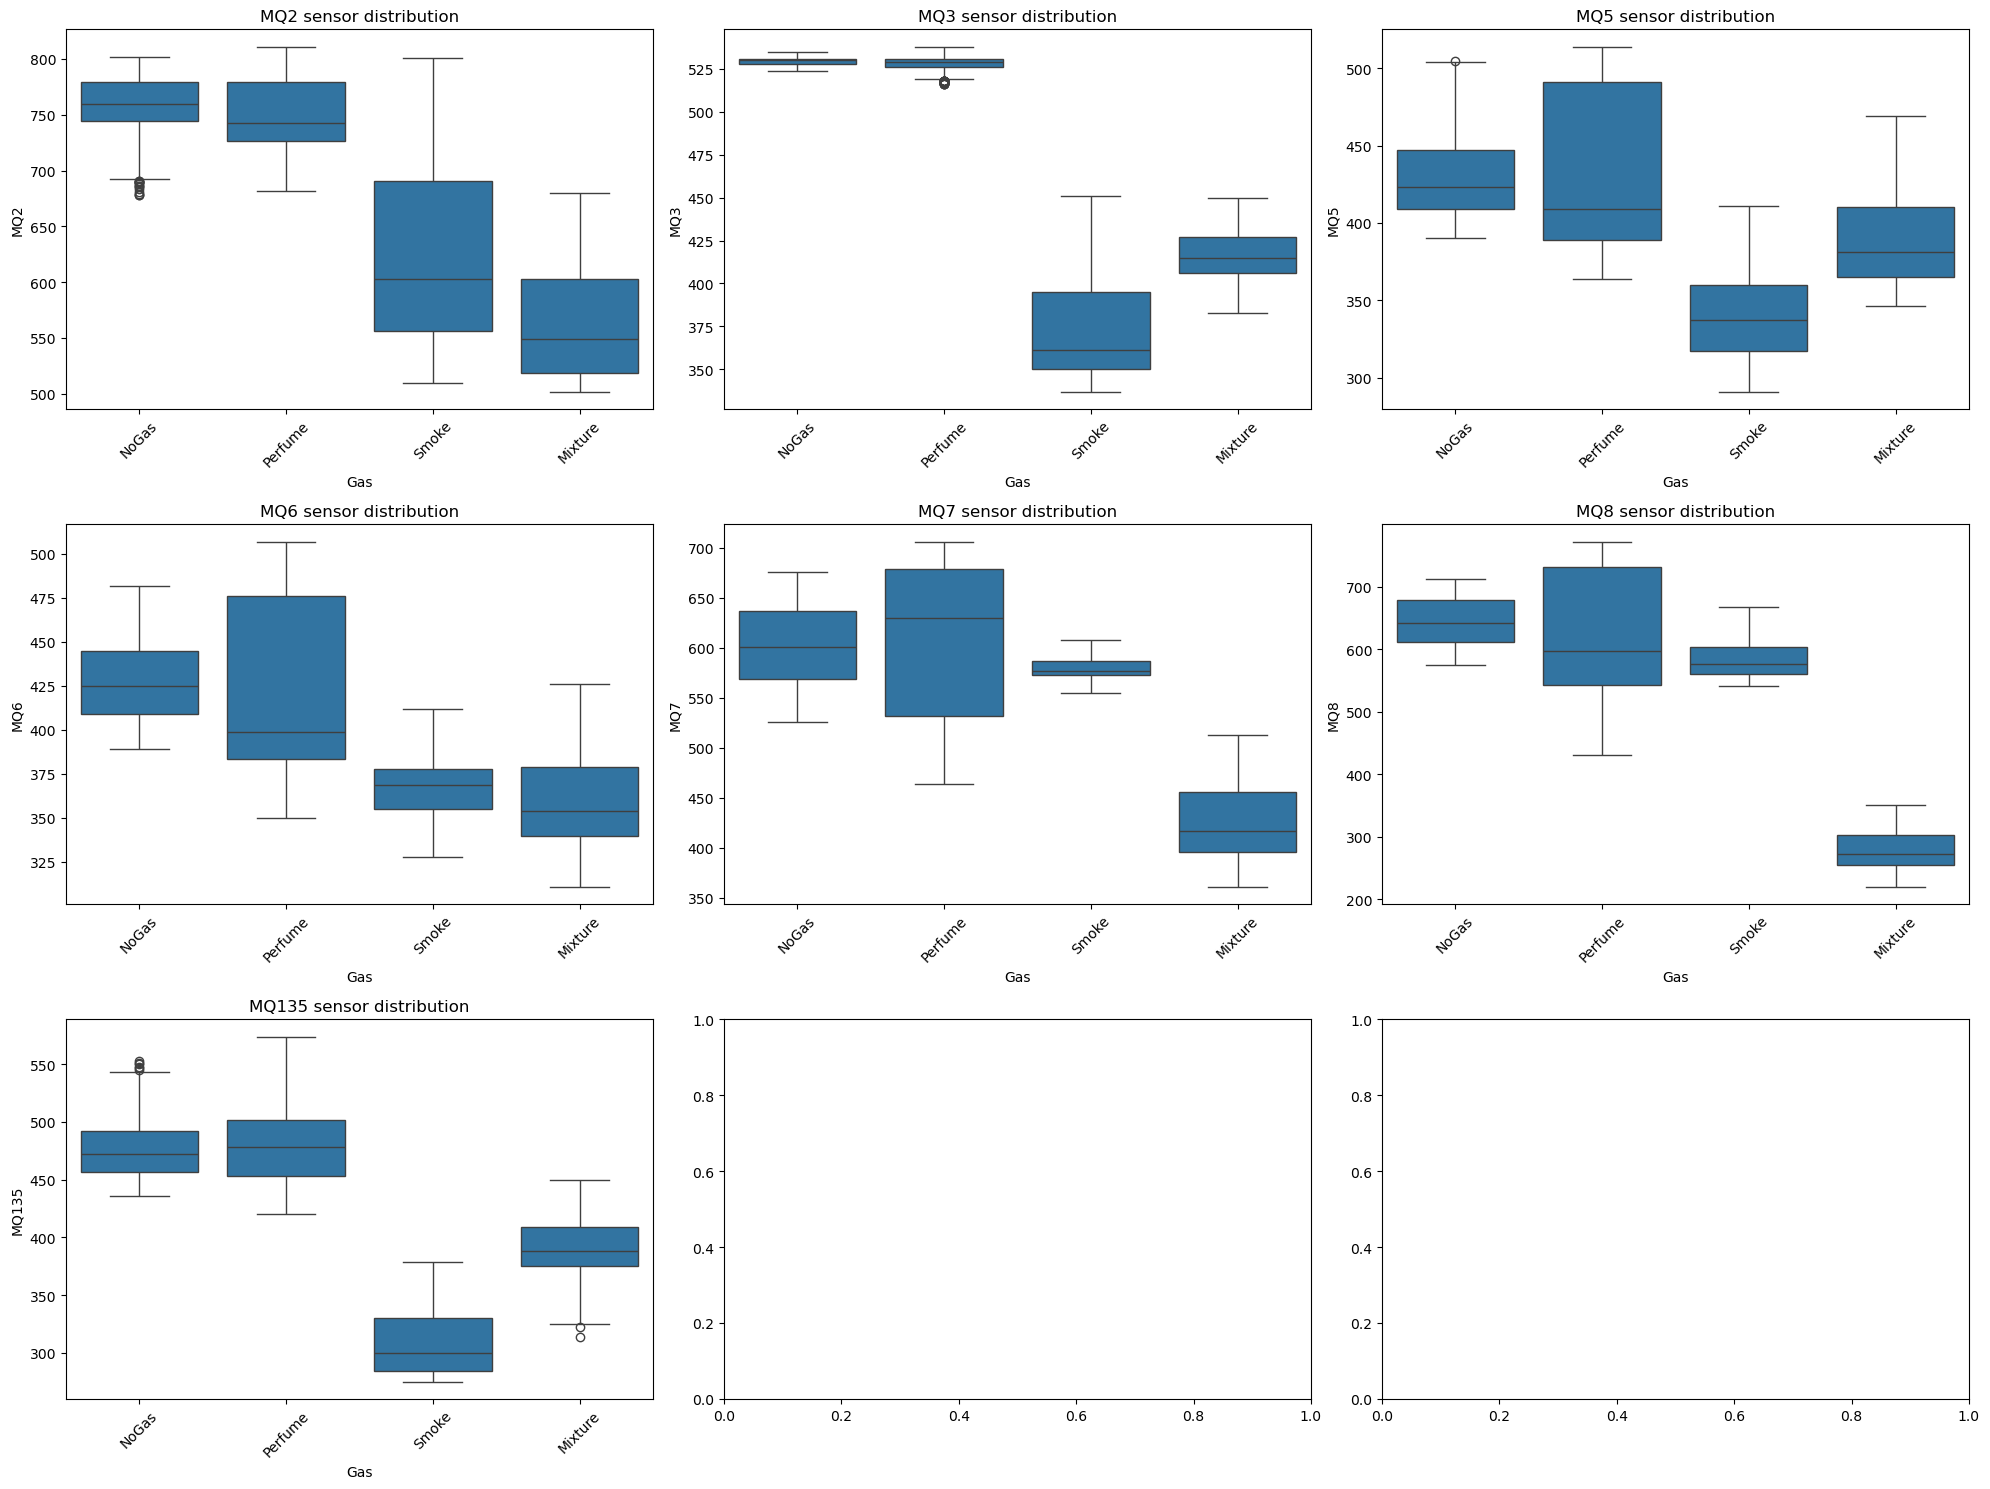

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel() # 넘파이 배열 1차원 flat 해주는

for i, sensor in enumerate(sensor_cols):
    sns.boxplot(data=df_final_cleaned, x='Gas', y=sensor, ax=axes[i])
    axes[i].set_title(f"{sensor} sensor distribution")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

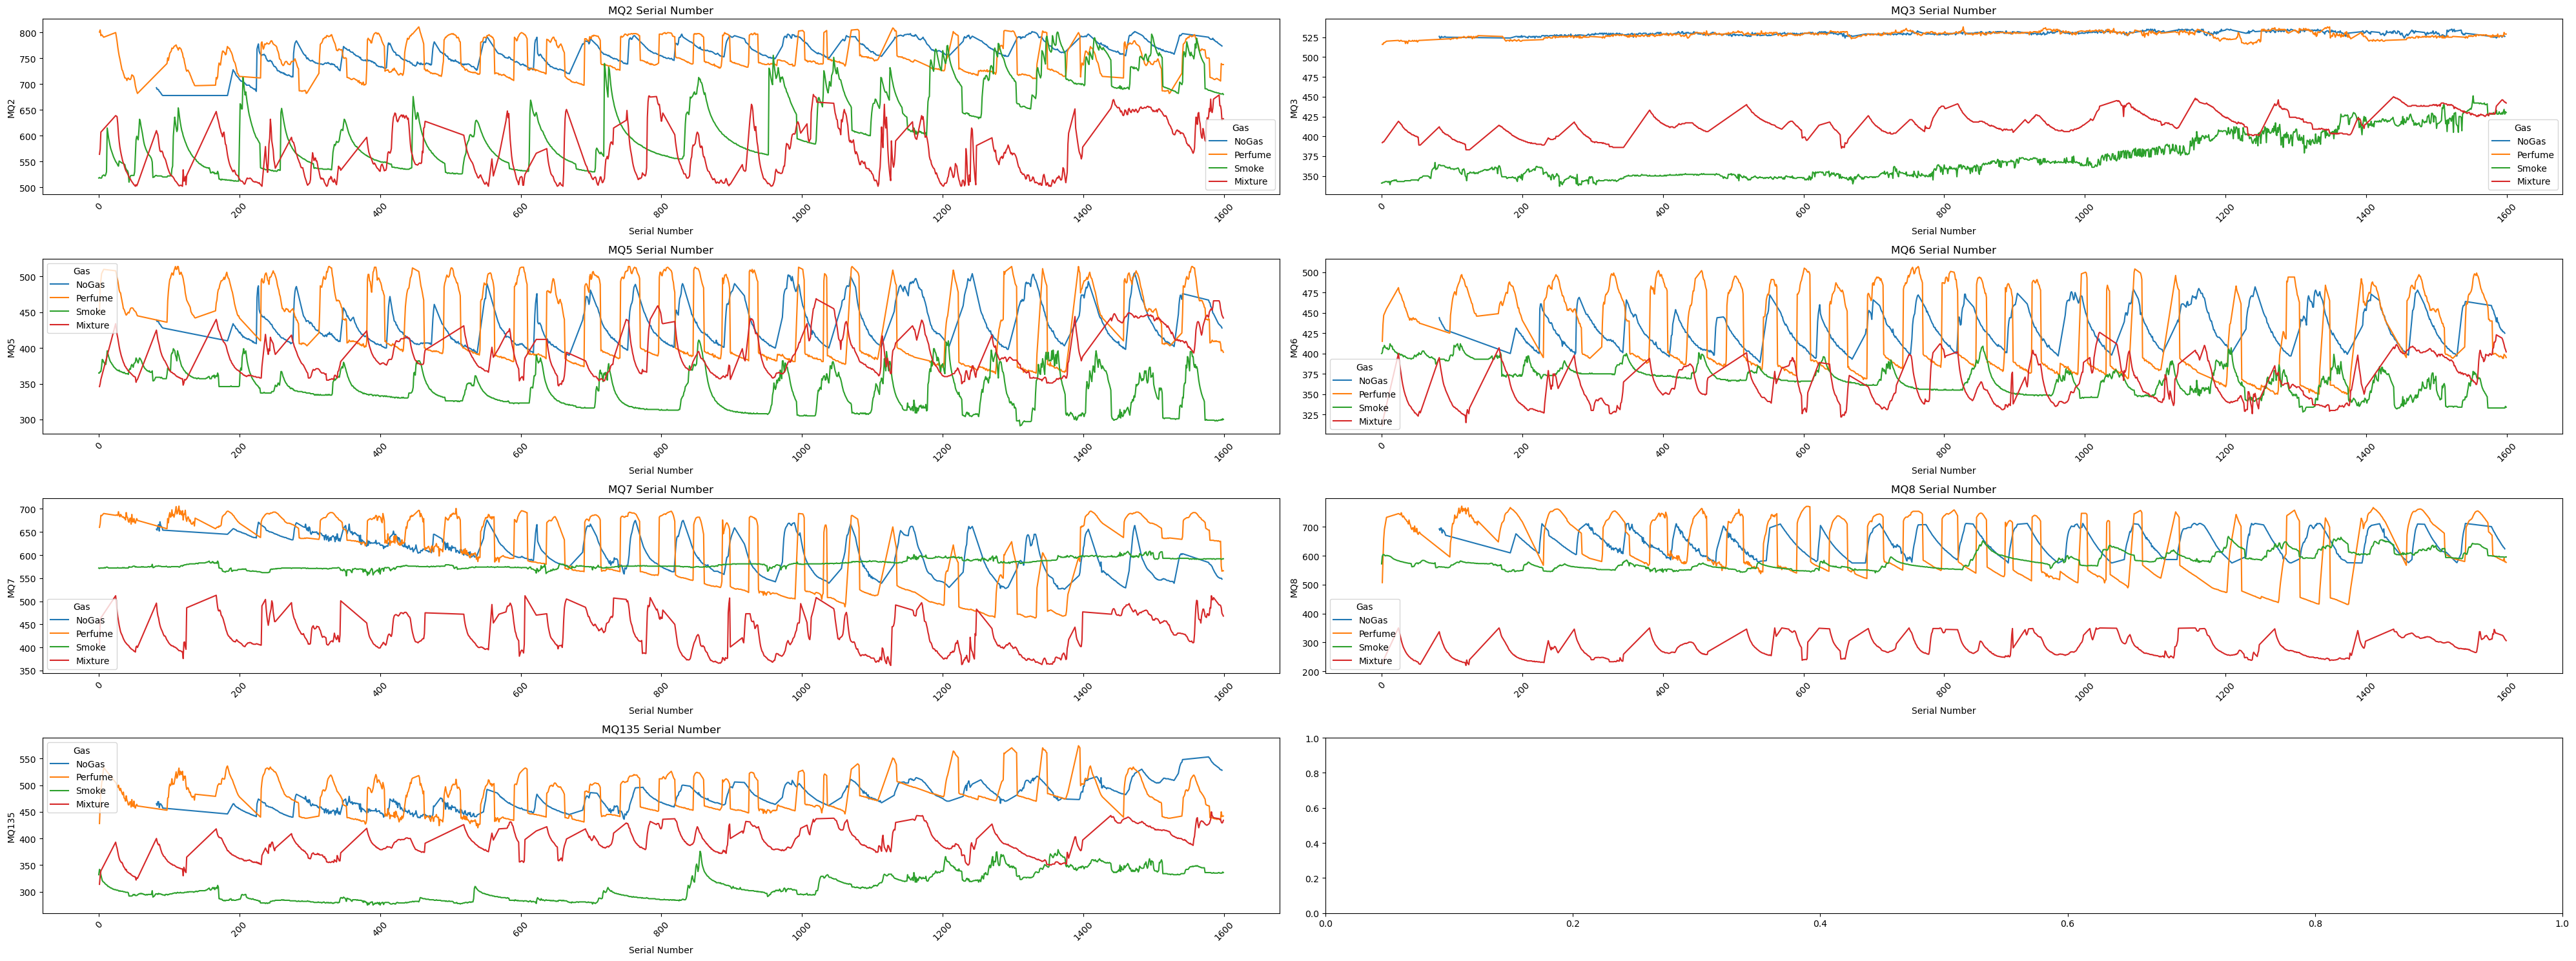

In [19]:
fig, axes = plt.subplots(4, 2, figsize=(40, 15))
axes = axes.ravel() # 넘파이 배열 1차원 flat 해주는

for i, sensor in enumerate(sensor_cols):
    sns.lineplot(data=df_final_cleaned, x=df_final_cleaned['Serial Number'], y=sensor, hue='Gas', ax=axes[i])
    axes[i].set_title(f"{sensor} Serial Number")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [46]:
# 이미지 경로 설정
image_base_path = "../datas/thermal_images_dataset/"
gas_classes = ['NoGas', 'Smoke', 'Perfume', 'Mixture']

image_paths = []
labels = []

for gas_type in gas_classes:
    gas_folder = os.path.join(image_base_path, gas_type)
    if os.path.isdir(gas_folder):
        for filename in os.listdir(gas_folder):
            if filename.endswith('.png'):
                image_paths.append(os.path.join(gas_folder, filename))
                labels.append(gas_type)

df_images = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

df_images.head()

image_path  label
0  ../datas/thermal_images_dataset/NoGas/335_NoGa...  NoGas
1  ../datas/thermal_images_dataset/NoGas/1434_NoG...  NoGas
2  ../datas/thermal_images_dataset/NoGas/1020_NoG...  NoGas
3  ../datas/thermal_images_dataset/NoGas/1502_NoG...  NoGas
4  ../datas/thermal_images_dataset/NoGas/542_NoGa...  NoGas

In [41]:
# 이미지 로드 및 전처리 함수
def load_and_preprocess_images(df, image_size=(224, 224)):
    images = []
    labels = []
    sensor_data = []
    failed_loads = []
    
    for idx, row in df.iterrows():
        gas_type = row['Gas']
        image_name = str(row['Corresponding Image Name'])
        
        # 이미지 파일명 처리
        if not image_name.endswith('.png'):
            image_name += '.png'
        
        image_path = os.path.join(image_base_path, gas_type, image_name)
        
        try:
            # 이미지 로드
            if os.path.exists(image_path):
                image = cv2.imread(image_path)
                if image is not None:
                    # BGR to RGB 변환
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    # 리사이즈
                    image = cv2.resize(image, image_size)
                    # 정규화
                    image = image.astype('float32') / 255.0
                    
                    images.append(image)
                    labels.append(gas_type)
                    
                    # 센서 데이터 추출
                    sensor_values = row[sensor_columns].values.astype('float32')
                    sensor_data.append(sensor_values)
                else:
                    failed_loads.append(image_path)
            else:
                failed_loads.append(image_path)
        except Exception as e:
            print(f"이미지 로드 실패 {image_path}: {e}")
            failed_loads.append(image_path)
    
    print(f"성공적으로 로드된 이미지: {len(images)}")
    print(f"로드 실패한 이미지: {len(failed_loads)}")
    
    if failed_loads:
        print("실패한 이미지 경로 (첫 10개):")
        for path in failed_loads[:10]:
            print(f"  {path}")
    
    return np.array(images), np.array(labels), np.array(sensor_data)

# 이미지 및 센서 데이터 로드
print("이미지 및 센서 데이터 로드 중...")
X_images, y_labels, X_sensors = load_and_preprocess_images(df_cleaned)

print(f"이미지 데이터 shape: {X_images.shape}")
print(f"센서 데이터 shape: {X_sensors.shape}")
print(f"레이블 수: {len(y_labels)}")

이미지 및 센서 데이터 로드 중...
성공적으로 로드된 이미지: 6400
로드 실패한 이미지: 0
이미지 데이터 shape: (6400, 224, 224, 3)
센서 데이터 shape: (6400, 7)
레이블 수: 6400


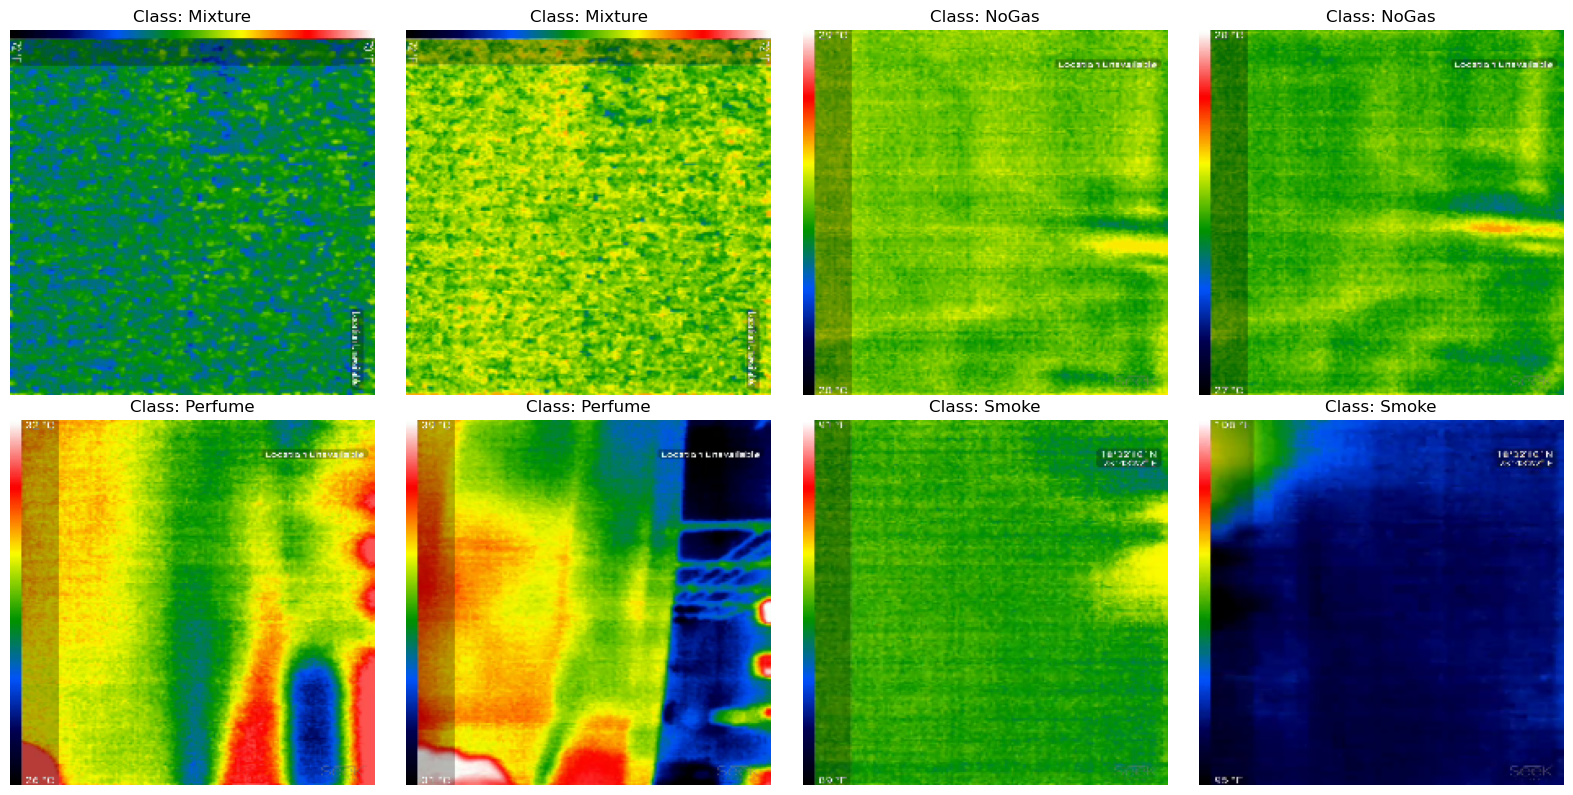

In [42]:
def visualize_sample_images(X_images, y_labels, num_samples=8):
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    axes = axes.ravel()
    
    # 각 클래스별로 샘플 선택
    unique_classes = np.unique(y_labels)
    samples_per_class = num_samples // len(unique_classes)
    
    sample_idx = 0
    for class_name in unique_classes:
        class_indices = np.where(y_labels == class_name)[0]
        selected_indices = np.random.choice(class_indices, 
                                          min(samples_per_class, len(class_indices)), 
                                          replace=False)
        
        for idx in selected_indices:
            if sample_idx < num_samples:
                axes[sample_idx].imshow(X_images[idx])
                axes[sample_idx].set_title(f'Class: {y_labels[idx]}')
                axes[sample_idx].axis('off')
                sample_idx += 1
    
    plt.tight_layout()
    plt.show()

visualize_sample_images(X_images, y_labels)